In [2]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import os
import cv2 
from matplotlib import pyplot as plt
import torch.utils.data as data
import numpy as np
from helpers.gan import Generator, Discriminator
from helpers.dataset import IconsDataset, basic_img_transform as img_transform
from helpers.visualization import visualize_images


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
root_dir = 'icons/png32/images/'
BATCH_SIZE = 64
bs = BATCH_SIZE
num_epochs = 500

In [4]:
dataset = IconsDataset(root_dir, transform=img_transform, imread_mode=cv2.IMREAD_GRAYSCALE)

In [5]:
loader = data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [6]:
test_batch = next(iter(loader))
convert = lambda x:np.reshape(x, (32, 32))
test_batch.size()

torch.Size([64, 1, 32, 32])

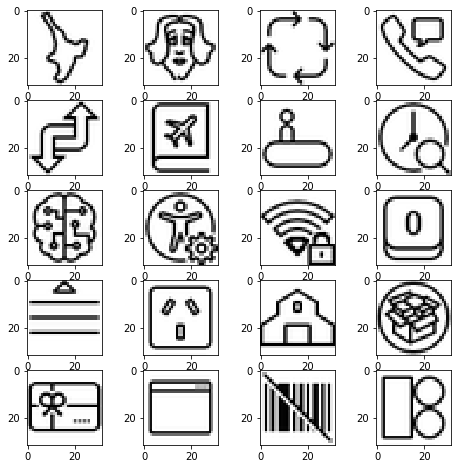

In [7]:
var = Variable(test_batch).cuda()
test_batch = test_batch.view(-1, 1, 32, 32)
visualize_images(test_batch, function=convert, cmap='gray')

In [8]:
def D_train(x):
    #=======================Train the discriminator=======================#
    D.zero_grad()

    # train discriminator on real
    x_real = x.view(-1, 1024)
    y_real = torch.ones(x_real.shape[0], 1)
    x_real, y_real = Variable(x_real.to(device)), Variable(y_real.to(device))

    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_score = D_output

    # train discriminator on facke
    z = Variable(torch.randn(bs, z_dim).to(device))
    x_fake, y_fake = G(z), Variable(torch.zeros(bs, 1).to(device))

    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_score = D_output

    # gradient backprop & optimize ONLY D's parameters
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()

def G_train(x):
    G.zero_grad()

    z = Variable(torch.randn(bs, 200).to(device))
    y = Variable(torch.ones(bs, 1).to(device))
    
    G_output = G(z)
    D_output = D(G_output)
    G_loss = criterion(D_output, y)

    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()

In [9]:
def generate_images(num_images):
    z = Variable(torch.randn(num_images, z_dim).to(device))
    images = G(z)
    images = images.reshape(-1, 32, 32)
    return images


  0%|          | 0/500 [00:00<?, ?it/s]

[0/500]: loss_d: 0.232816, loss_g: 6.431459


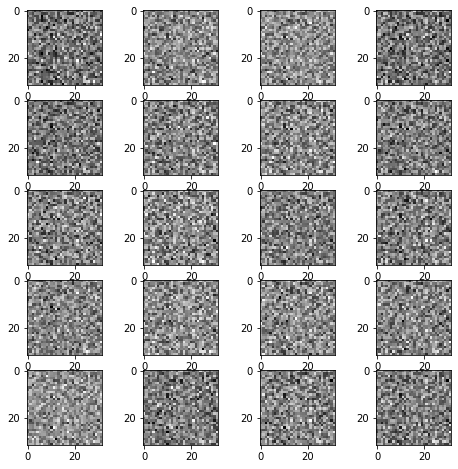


  0%|          | 2/500 [00:06<27:52,  3.36s/it]

[1/500]: loss_d: 0.482619, loss_g: 5.869381



  1%|          | 3/500 [00:08<24:53,  3.00s/it]

[2/500]: loss_d: 0.421385, loss_g: 5.728320



  1%|          | 4/500 [00:10<23:01,  2.78s/it]

[3/500]: loss_d: 0.364444, loss_g: 6.503619



  1%|          | 5/500 [00:12<21:40,  2.63s/it]

[4/500]: loss_d: 0.391635, loss_g: 6.231020



  1%|          | 6/500 [00:15<20:48,  2.53s/it]

[5/500]: loss_d: 0.407409, loss_g: 5.829781



  1%|▏         | 7/500 [00:17<20:12,  2.46s/it]

[6/500]: loss_d: 0.460750, loss_g: 5.328104



  2%|▏         | 8/500 [00:19<19:47,  2.41s/it]

[7/500]: loss_d: 0.538455, loss_g: 4.848467



  2%|▏         | 9/500 [00:21<19:17,  2.36s/it]

[8/500]: loss_d: 0.600562, loss_g: 4.457719



  2%|▏         | 10/500 [00:24<19:39,  2.41s/it]

[9/500]: loss_d: 0.659267, loss_g: 4.109406
[10/500]: loss_d: 0.714131, loss_g: 3.843840


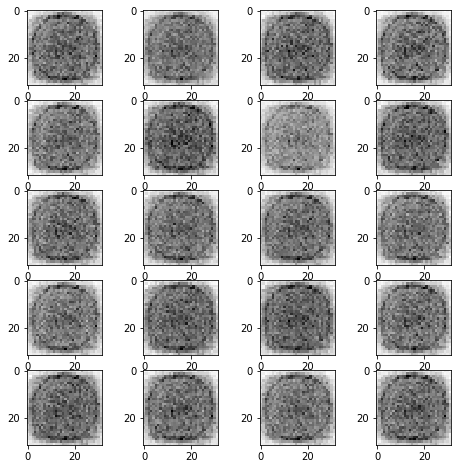


  2%|▏         | 12/500 [00:30<22:22,  2.75s/it]

[11/500]: loss_d: 0.758614, loss_g: 3.598028



  3%|▎         | 13/500 [00:33<21:51,  2.69s/it]

[12/500]: loss_d: 0.787266, loss_g: 3.408099



  3%|▎         | 14/500 [00:35<20:55,  2.58s/it]

[13/500]: loss_d: 0.805443, loss_g: 3.240105



  3%|▎         | 15/500 [00:38<20:33,  2.54s/it]

[14/500]: loss_d: 0.813560, loss_g: 3.105408



  3%|▎         | 16/500 [00:40<20:26,  2.53s/it]

[15/500]: loss_d: 0.812497, loss_g: 2.998582



  3%|▎         | 17/500 [00:43<19:43,  2.45s/it]

[16/500]: loss_d: 0.800551, loss_g: 2.926050



  4%|▎         | 18/500 [00:45<19:13,  2.39s/it]

[17/500]: loss_d: 0.792859, loss_g: 2.863680



  4%|▍         | 19/500 [00:47<18:53,  2.36s/it]

[18/500]: loss_d: 0.784559, loss_g: 2.815780



  4%|▍         | 20/500 [00:49<18:37,  2.33s/it]

[19/500]: loss_d: 0.769595, loss_g: 2.779755
[20/500]: loss_d: 0.762318, loss_g: 2.740118


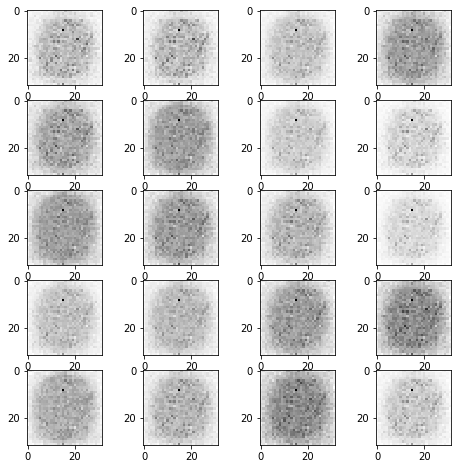


  4%|▍         | 22/500 [00:56<21:43,  2.73s/it]

[21/500]: loss_d: 0.756239, loss_g: 2.704354



  5%|▍         | 23/500 [00:58<20:21,  2.56s/it]

[22/500]: loss_d: 0.751005, loss_g: 2.672119



  5%|▍         | 24/500 [01:00<19:43,  2.49s/it]

[23/500]: loss_d: 0.745356, loss_g: 2.641228



  5%|▌         | 25/500 [01:03<19:12,  2.43s/it]

[24/500]: loss_d: 0.741751, loss_g: 2.608724



  5%|▌         | 26/500 [01:05<18:51,  2.39s/it]

[25/500]: loss_d: 0.738527, loss_g: 2.591405



  5%|▌         | 27/500 [01:07<18:29,  2.34s/it]

[26/500]: loss_d: 0.732972, loss_g: 2.569877



  6%|▌         | 28/500 [01:09<18:22,  2.33s/it]

[27/500]: loss_d: 0.727557, loss_g: 2.557508



  6%|▌         | 29/500 [01:12<18:11,  2.32s/it]

[28/500]: loss_d: 0.720644, loss_g: 2.545930



  6%|▌         | 30/500 [01:14<17:57,  2.29s/it]

[29/500]: loss_d: 0.715865, loss_g: 2.542315
[30/500]: loss_d: 0.711565, loss_g: 2.535794


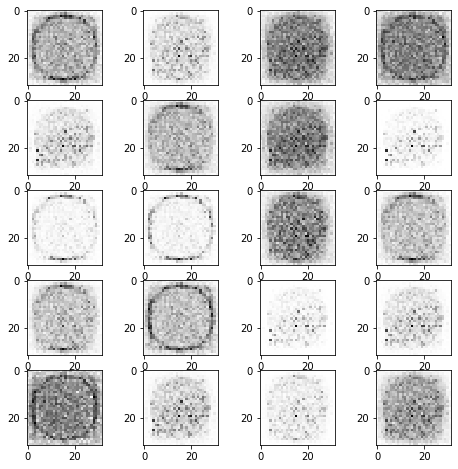


  6%|▋         | 32/500 [01:20<20:41,  2.65s/it]

[31/500]: loss_d: 0.715318, loss_g: 2.515954



  7%|▋         | 33/500 [01:23<19:49,  2.55s/it]

[32/500]: loss_d: 0.712813, loss_g: 2.505305



  7%|▋         | 34/500 [01:25<19:06,  2.46s/it]

[33/500]: loss_d: 0.708675, loss_g: 2.498078



  7%|▋         | 35/500 [01:27<18:41,  2.41s/it]

[34/500]: loss_d: 0.707451, loss_g: 2.489445



  7%|▋         | 36/500 [01:29<18:16,  2.36s/it]

[35/500]: loss_d: 0.706233, loss_g: 2.480364



  7%|▋         | 37/500 [01:31<17:42,  2.29s/it]

[36/500]: loss_d: 0.703276, loss_g: 2.486820



  8%|▊         | 38/500 [01:34<17:29,  2.27s/it]

[37/500]: loss_d: 0.702599, loss_g: 2.481612



  8%|▊         | 39/500 [01:36<17:10,  2.24s/it]

[38/500]: loss_d: 0.704082, loss_g: 2.471116



  8%|▊         | 40/500 [01:38<17:06,  2.23s/it]

[39/500]: loss_d: 0.706129, loss_g: 2.460797
[40/500]: loss_d: 0.708945, loss_g: 2.444962


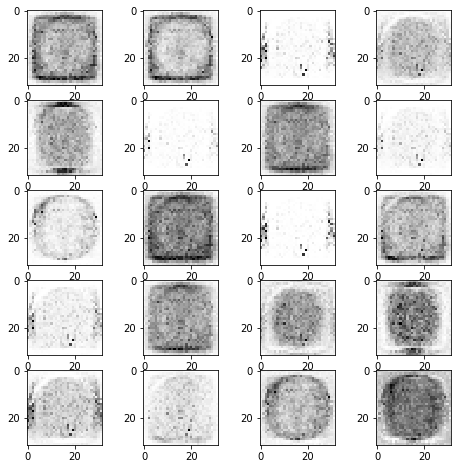


  8%|▊         | 42/500 [01:44<20:06,  2.63s/it]

[41/500]: loss_d: 0.711867, loss_g: 2.427478



  9%|▊         | 43/500 [01:47<19:25,  2.55s/it]

[42/500]: loss_d: 0.712084, loss_g: 2.413554



  9%|▉         | 44/500 [01:49<18:35,  2.45s/it]

[43/500]: loss_d: 0.712533, loss_g: 2.403443



  9%|▉         | 45/500 [01:51<18:05,  2.39s/it]

[44/500]: loss_d: 0.712307, loss_g: 2.395663



  9%|▉         | 46/500 [01:53<17:34,  2.32s/it]

[45/500]: loss_d: 0.711423, loss_g: 2.389645



  9%|▉         | 47/500 [01:56<17:38,  2.34s/it]

[46/500]: loss_d: 0.710953, loss_g: 2.384097



 10%|▉         | 48/500 [01:58<17:39,  2.34s/it]

[47/500]: loss_d: 0.710603, loss_g: 2.379848



 10%|▉         | 49/500 [02:01<17:55,  2.39s/it]

[48/500]: loss_d: 0.708609, loss_g: 2.381989



 10%|█         | 50/500 [02:03<17:34,  2.34s/it]

[49/500]: loss_d: 0.708667, loss_g: 2.377659
[50/500]: loss_d: 0.707430, loss_g: 2.375534


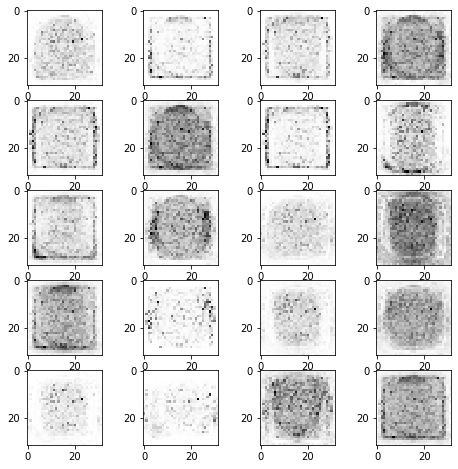


 10%|█         | 52/500 [02:09<20:15,  2.71s/it]

[51/500]: loss_d: 0.705559, loss_g: 2.375792



 11%|█         | 53/500 [02:12<19:53,  2.67s/it]

[52/500]: loss_d: 0.704715, loss_g: 2.375608



 11%|█         | 54/500 [02:14<19:26,  2.62s/it]

[53/500]: loss_d: 0.703963, loss_g: 2.373352



 11%|█         | 55/500 [02:17<18:32,  2.50s/it]

[54/500]: loss_d: 0.704495, loss_g: 2.366026



 11%|█         | 56/500 [02:19<18:21,  2.48s/it]

[55/500]: loss_d: 0.703584, loss_g: 2.363307



 11%|█▏        | 57/500 [02:22<18:45,  2.54s/it]

[56/500]: loss_d: 0.702452, loss_g: 2.365152



 12%|█▏        | 58/500 [02:24<17:49,  2.42s/it]

[57/500]: loss_d: 0.701686, loss_g: 2.364587



 12%|█▏        | 59/500 [02:26<17:02,  2.32s/it]

[58/500]: loss_d: 0.701533, loss_g: 2.364750



 12%|█▏        | 60/500 [02:28<16:29,  2.25s/it]

[59/500]: loss_d: 0.700946, loss_g: 2.364706
[60/500]: loss_d: 0.700275, loss_g: 2.369520


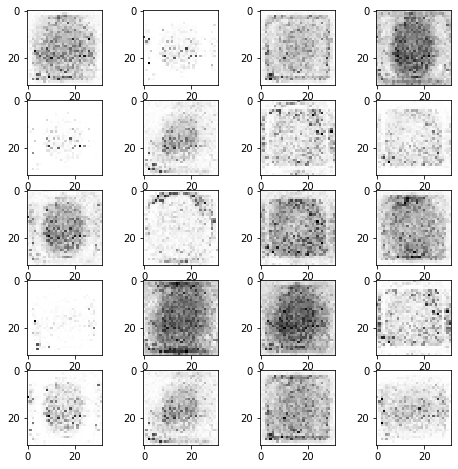


 12%|█▏        | 62/500 [02:34<19:00,  2.60s/it]

[61/500]: loss_d: 0.699711, loss_g: 2.371221



 13%|█▎        | 63/500 [02:37<18:43,  2.57s/it]

[62/500]: loss_d: 0.699214, loss_g: 2.373013



 13%|█▎        | 64/500 [02:39<17:42,  2.44s/it]

[63/500]: loss_d: 0.698027, loss_g: 2.374162



 13%|█▎        | 65/500 [02:41<16:58,  2.34s/it]

[64/500]: loss_d: 0.697691, loss_g: 2.372739



 13%|█▎        | 66/500 [02:43<16:41,  2.31s/it]

[65/500]: loss_d: 0.697936, loss_g: 2.371229



 13%|█▎        | 67/500 [02:45<16:22,  2.27s/it]

[66/500]: loss_d: 0.697420, loss_g: 2.378086



 14%|█▎        | 68/500 [02:47<16:12,  2.25s/it]

[67/500]: loss_d: 0.696364, loss_g: 2.378288



 14%|█▍        | 69/500 [02:50<16:08,  2.25s/it]

[68/500]: loss_d: 0.697103, loss_g: 2.375191



 14%|█▍        | 70/500 [02:52<15:53,  2.22s/it]

[69/500]: loss_d: 0.696791, loss_g: 2.373992
[70/500]: loss_d: 0.696277, loss_g: 2.375775


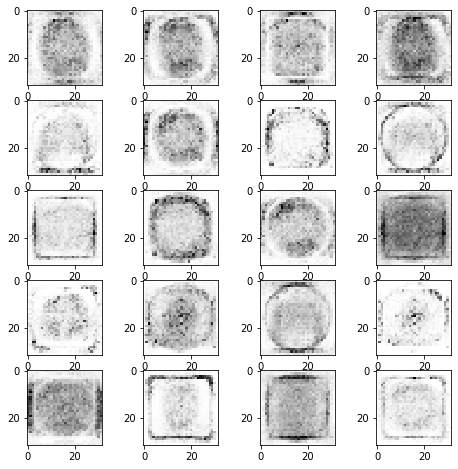


 14%|█▍        | 72/500 [02:59<19:25,  2.72s/it]

[71/500]: loss_d: 0.695624, loss_g: 2.375465



 15%|█▍        | 73/500 [03:01<18:03,  2.54s/it]

[72/500]: loss_d: 0.694777, loss_g: 2.374804



 15%|█▍        | 74/500 [03:03<17:19,  2.44s/it]

[73/500]: loss_d: 0.693659, loss_g: 2.374761



 15%|█▌        | 75/500 [03:05<16:50,  2.38s/it]

[74/500]: loss_d: 0.692486, loss_g: 2.378239



 15%|█▌        | 76/500 [03:07<16:28,  2.33s/it]

[75/500]: loss_d: 0.691660, loss_g: 2.381234



 15%|█▌        | 77/500 [03:10<16:04,  2.28s/it]

[76/500]: loss_d: 0.690608, loss_g: 2.385862



 16%|█▌        | 78/500 [03:12<15:47,  2.24s/it]

[77/500]: loss_d: 0.690843, loss_g: 2.385970



 16%|█▌        | 79/500 [03:14<15:30,  2.21s/it]

[78/500]: loss_d: 0.690157, loss_g: 2.386237



 16%|█▌        | 80/500 [03:16<15:42,  2.24s/it]

[79/500]: loss_d: 0.689739, loss_g: 2.392118
[80/500]: loss_d: 0.689355, loss_g: 2.392986


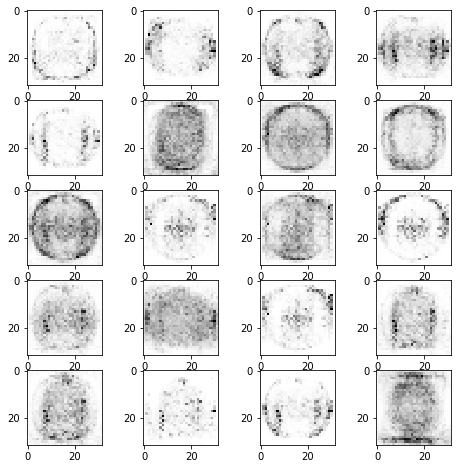


 16%|█▋        | 82/500 [03:23<19:06,  2.74s/it]

[81/500]: loss_d: 0.688517, loss_g: 2.393614



 17%|█▋        | 83/500 [03:25<18:10,  2.62s/it]

[82/500]: loss_d: 0.688501, loss_g: 2.393652



 17%|█▋        | 84/500 [03:28<17:28,  2.52s/it]

[83/500]: loss_d: 0.688040, loss_g: 2.392696



 17%|█▋        | 85/500 [03:30<16:56,  2.45s/it]

[84/500]: loss_d: 0.687682, loss_g: 2.399668



 17%|█▋        | 86/500 [03:32<16:20,  2.37s/it]

[85/500]: loss_d: 0.687664, loss_g: 2.400831



 17%|█▋        | 87/500 [03:34<15:44,  2.29s/it]

[86/500]: loss_d: 0.686603, loss_g: 2.404760



 18%|█▊        | 88/500 [03:36<15:15,  2.22s/it]

[87/500]: loss_d: 0.685663, loss_g: 2.406059



 18%|█▊        | 89/500 [03:38<14:58,  2.19s/it]

[88/500]: loss_d: 0.684575, loss_g: 2.411520



 18%|█▊        | 90/500 [03:40<14:46,  2.16s/it]

[89/500]: loss_d: 0.684450, loss_g: 2.412574
[90/500]: loss_d: 0.684332, loss_g: 2.412432


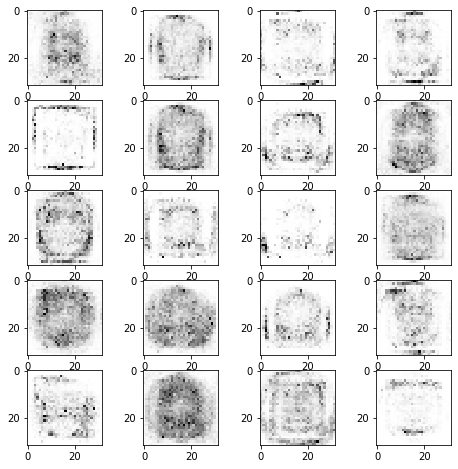


 18%|█▊        | 92/500 [03:46<16:32,  2.43s/it]

[91/500]: loss_d: 0.683907, loss_g: 2.414175



 19%|█▊        | 93/500 [03:48<15:50,  2.33s/it]

[92/500]: loss_d: 0.683837, loss_g: 2.414233



 19%|█▉        | 94/500 [03:50<15:17,  2.26s/it]

[93/500]: loss_d: 0.683290, loss_g: 2.417334



 19%|█▉        | 95/500 [03:52<14:57,  2.22s/it]

[94/500]: loss_d: 0.683287, loss_g: 2.418145



 19%|█▉        | 96/500 [03:54<14:41,  2.18s/it]

[95/500]: loss_d: 0.683248, loss_g: 2.420164



 19%|█▉        | 97/500 [03:56<14:26,  2.15s/it]

[96/500]: loss_d: 0.682552, loss_g: 2.422718



 20%|█▉        | 98/500 [03:59<14:17,  2.13s/it]

[97/500]: loss_d: 0.682144, loss_g: 2.425761



 20%|█▉        | 99/500 [04:01<14:10,  2.12s/it]

[98/500]: loss_d: 0.681637, loss_g: 2.428409



 20%|██        | 100/500 [04:03<14:30,  2.18s/it]

[99/500]: loss_d: 0.680417, loss_g: 2.432662
[100/500]: loss_d: 0.680153, loss_g: 2.436173


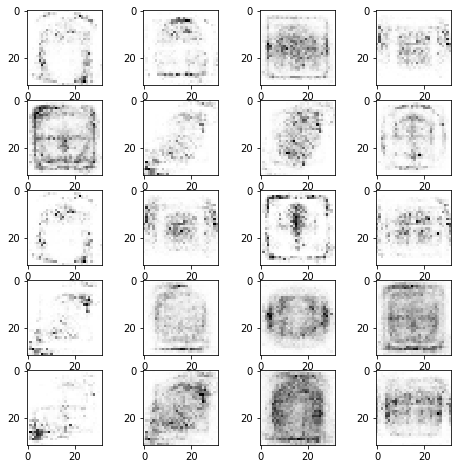


 20%|██        | 102/500 [04:10<18:23,  2.77s/it]

[101/500]: loss_d: 0.678998, loss_g: 2.440548



 21%|██        | 103/500 [04:12<17:32,  2.65s/it]

[102/500]: loss_d: 0.678068, loss_g: 2.445391



 21%|██        | 104/500 [04:15<16:32,  2.51s/it]

[103/500]: loss_d: 0.677731, loss_g: 2.448696



 21%|██        | 105/500 [04:17<16:05,  2.44s/it]

[104/500]: loss_d: 0.677109, loss_g: 2.454693



 21%|██        | 106/500 [04:19<15:27,  2.35s/it]

[105/500]: loss_d: 0.676691, loss_g: 2.456831



 21%|██▏       | 107/500 [04:21<15:02,  2.30s/it]

[106/500]: loss_d: 0.675993, loss_g: 2.458899



 22%|██▏       | 108/500 [04:24<15:27,  2.37s/it]

[107/500]: loss_d: 0.675428, loss_g: 2.464496



 22%|██▏       | 109/500 [04:26<15:01,  2.31s/it]

[108/500]: loss_d: 0.674968, loss_g: 2.466967



 22%|██▏       | 110/500 [04:28<14:43,  2.26s/it]

[109/500]: loss_d: 0.673793, loss_g: 2.471228
[110/500]: loss_d: 0.672918, loss_g: 2.474849


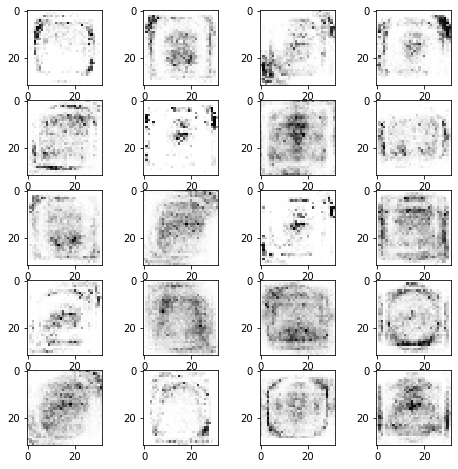


 22%|██▏       | 112/500 [04:34<16:34,  2.56s/it]

[111/500]: loss_d: 0.672417, loss_g: 2.477125



 23%|██▎       | 113/500 [04:36<15:55,  2.47s/it]

[112/500]: loss_d: 0.671287, loss_g: 2.481800



 23%|██▎       | 114/500 [04:39<16:40,  2.59s/it]

[113/500]: loss_d: 0.670035, loss_g: 2.489151



 23%|██▎       | 115/500 [04:42<16:27,  2.56s/it]

[114/500]: loss_d: 0.669272, loss_g: 2.495706



 23%|██▎       | 116/500 [04:44<16:05,  2.52s/it]

[115/500]: loss_d: 0.668368, loss_g: 2.500360



 23%|██▎       | 117/500 [04:46<15:30,  2.43s/it]

[116/500]: loss_d: 0.666977, loss_g: 2.506160



 24%|██▎       | 118/500 [04:49<15:23,  2.42s/it]

[117/500]: loss_d: 0.665806, loss_g: 2.511658



 24%|██▍       | 119/500 [04:51<14:58,  2.36s/it]

[118/500]: loss_d: 0.664806, loss_g: 2.515135



 24%|██▍       | 120/500 [04:53<14:28,  2.29s/it]

[119/500]: loss_d: 0.664028, loss_g: 2.520155
[120/500]: loss_d: 0.662592, loss_g: 2.526175


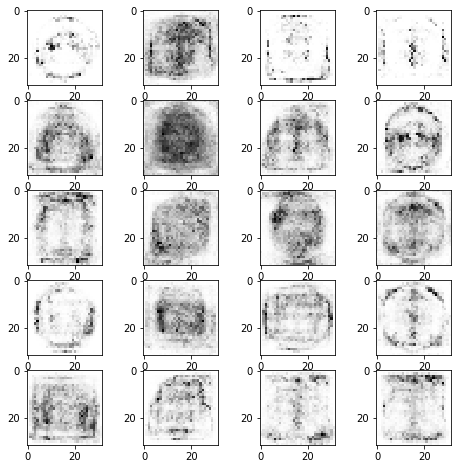


 24%|██▍       | 122/500 [04:59<16:29,  2.62s/it]

[121/500]: loss_d: 0.661217, loss_g: 2.530543



 25%|██▍       | 123/500 [05:01<15:53,  2.53s/it]

[122/500]: loss_d: 0.659981, loss_g: 2.536997



 25%|██▍       | 124/500 [05:04<16:16,  2.60s/it]

[123/500]: loss_d: 0.659064, loss_g: 2.544165



 25%|██▌       | 125/500 [05:08<17:33,  2.81s/it]

[124/500]: loss_d: 0.657899, loss_g: 2.547815



 25%|██▌       | 126/500 [05:11<18:26,  2.96s/it]

[125/500]: loss_d: 0.656891, loss_g: 2.552276



 25%|██▌       | 127/500 [05:13<17:31,  2.82s/it]

[126/500]: loss_d: 0.655803, loss_g: 2.558106



 26%|██▌       | 128/500 [05:16<16:21,  2.64s/it]

[127/500]: loss_d: 0.655027, loss_g: 2.565197



 26%|██▌       | 129/500 [05:18<15:29,  2.50s/it]

[128/500]: loss_d: 0.654091, loss_g: 2.568311



 26%|██▌       | 130/500 [05:20<15:38,  2.54s/it]

[129/500]: loss_d: 0.652737, loss_g: 2.571172
[130/500]: loss_d: 0.651807, loss_g: 2.573556


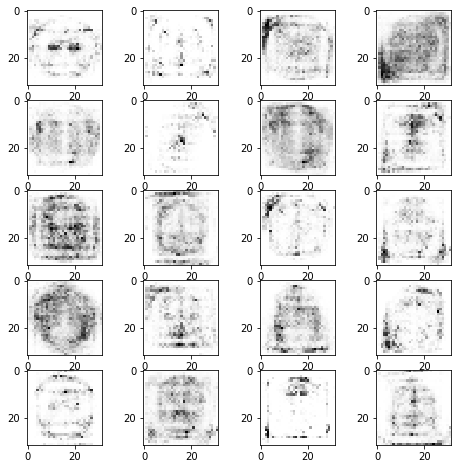


 26%|██▋       | 132/500 [05:27<17:32,  2.86s/it]

[131/500]: loss_d: 0.651083, loss_g: 2.576980



 27%|██▋       | 133/500 [05:29<16:30,  2.70s/it]

[132/500]: loss_d: 0.650048, loss_g: 2.580288



 27%|██▋       | 134/500 [05:32<15:54,  2.61s/it]

[133/500]: loss_d: 0.649307, loss_g: 2.585925



 27%|██▋       | 135/500 [05:34<15:31,  2.55s/it]

[134/500]: loss_d: 0.648464, loss_g: 2.589429



 27%|██▋       | 136/500 [05:36<14:53,  2.45s/it]

[135/500]: loss_d: 0.648212, loss_g: 2.592420



 27%|██▋       | 137/500 [05:39<14:26,  2.39s/it]

[136/500]: loss_d: 0.647325, loss_g: 2.595778



 28%|██▊       | 138/500 [05:41<14:15,  2.36s/it]

[137/500]: loss_d: 0.646417, loss_g: 2.599869



 28%|██▊       | 139/500 [05:43<13:54,  2.31s/it]

[138/500]: loss_d: 0.645664, loss_g: 2.601794



 28%|██▊       | 140/500 [05:45<13:54,  2.32s/it]

[139/500]: loss_d: 0.645042, loss_g: 2.604882
[140/500]: loss_d: 0.644623, loss_g: 2.607200


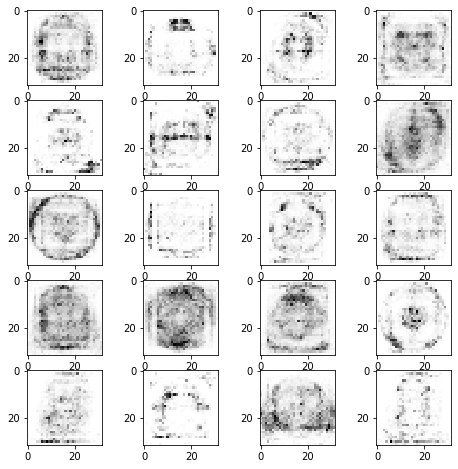


 28%|██▊       | 142/500 [05:52<16:39,  2.79s/it]

[141/500]: loss_d: 0.644237, loss_g: 2.609392



 29%|██▊       | 143/500 [05:55<16:33,  2.78s/it]

[142/500]: loss_d: 0.643699, loss_g: 2.612093



 29%|██▉       | 144/500 [05:57<15:20,  2.59s/it]

[143/500]: loss_d: 0.642917, loss_g: 2.614272



 29%|██▉       | 145/500 [06:00<15:18,  2.59s/it]

[144/500]: loss_d: 0.642332, loss_g: 2.617458



 29%|██▉       | 146/500 [06:02<14:34,  2.47s/it]

[145/500]: loss_d: 0.641807, loss_g: 2.621800



 29%|██▉       | 147/500 [06:04<14:26,  2.45s/it]

[146/500]: loss_d: 0.641386, loss_g: 2.625825



 30%|██▉       | 148/500 [06:07<14:22,  2.45s/it]

[147/500]: loss_d: 0.640947, loss_g: 2.627053



 30%|██▉       | 149/500 [06:09<14:45,  2.52s/it]

[148/500]: loss_d: 0.640542, loss_g: 2.629374



 30%|███       | 150/500 [06:12<14:52,  2.55s/it]

[149/500]: loss_d: 0.640046, loss_g: 2.630672
[150/500]: loss_d: 0.639525, loss_g: 2.632272


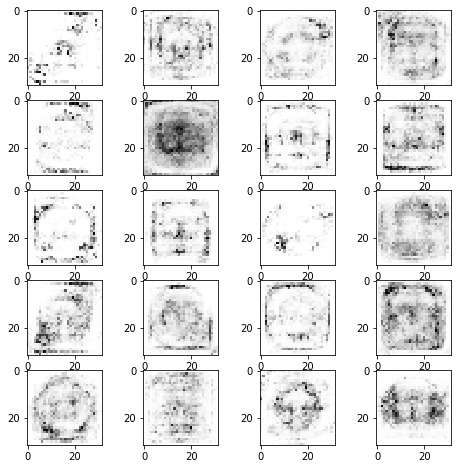


 30%|███       | 152/500 [06:19<17:30,  3.02s/it]

[151/500]: loss_d: 0.639108, loss_g: 2.635990



 31%|███       | 153/500 [06:21<16:05,  2.78s/it]

[152/500]: loss_d: 0.639104, loss_g: 2.638477



 31%|███       | 154/500 [06:24<15:43,  2.73s/it]

[153/500]: loss_d: 0.639185, loss_g: 2.639146



 31%|███       | 155/500 [06:26<14:58,  2.61s/it]

[154/500]: loss_d: 0.638880, loss_g: 2.640940



 31%|███       | 156/500 [06:29<14:15,  2.49s/it]

[155/500]: loss_d: 0.638521, loss_g: 2.644272



 31%|███▏      | 157/500 [06:31<13:39,  2.39s/it]

[156/500]: loss_d: 0.638225, loss_g: 2.645351



 32%|███▏      | 158/500 [06:33<13:20,  2.34s/it]

[157/500]: loss_d: 0.637907, loss_g: 2.647153



 32%|███▏      | 159/500 [06:35<13:05,  2.30s/it]

[158/500]: loss_d: 0.637260, loss_g: 2.650293



 32%|███▏      | 160/500 [06:37<12:52,  2.27s/it]

[159/500]: loss_d: 0.636991, loss_g: 2.651820
[160/500]: loss_d: 0.636587, loss_g: 2.653807


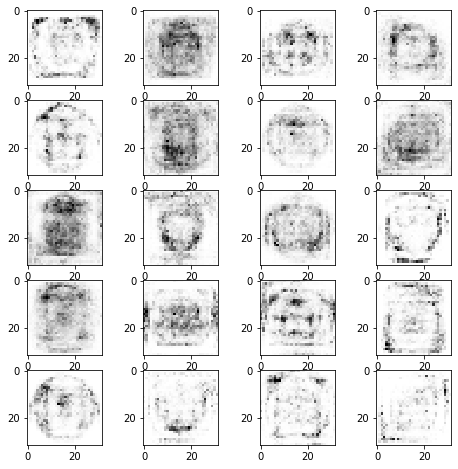


 32%|███▏      | 162/500 [06:45<16:11,  2.88s/it]

[161/500]: loss_d: 0.635989, loss_g: 2.655008



 33%|███▎      | 163/500 [06:48<15:53,  2.83s/it]

[162/500]: loss_d: 0.635582, loss_g: 2.657154



 33%|███▎      | 164/500 [06:50<14:43,  2.63s/it]

[163/500]: loss_d: 0.635056, loss_g: 2.658728



 33%|███▎      | 165/500 [06:52<14:05,  2.52s/it]

[164/500]: loss_d: 0.634839, loss_g: 2.660733



 33%|███▎      | 166/500 [06:54<13:42,  2.46s/it]

[165/500]: loss_d: 0.634460, loss_g: 2.663046



 33%|███▎      | 167/500 [06:56<13:07,  2.37s/it]

[166/500]: loss_d: 0.634117, loss_g: 2.665653



 34%|███▎      | 168/500 [06:59<12:55,  2.34s/it]

[167/500]: loss_d: 0.633717, loss_g: 2.669380



 34%|███▍      | 169/500 [07:01<12:48,  2.32s/it]

[168/500]: loss_d: 0.633475, loss_g: 2.670996



 34%|███▍      | 170/500 [07:03<13:02,  2.37s/it]

[169/500]: loss_d: 0.633176, loss_g: 2.672529
[170/500]: loss_d: 0.632711, loss_g: 2.675283


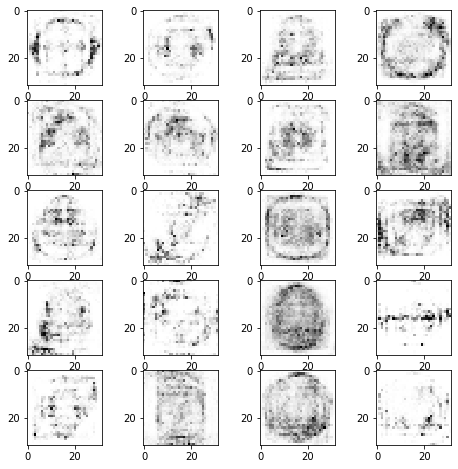


 34%|███▍      | 172/500 [07:11<16:15,  2.97s/it]

[171/500]: loss_d: 0.632403, loss_g: 2.678857



 35%|███▍      | 173/500 [07:14<15:46,  2.90s/it]

[172/500]: loss_d: 0.632133, loss_g: 2.681118



 35%|███▍      | 174/500 [07:16<15:29,  2.85s/it]

[173/500]: loss_d: 0.631926, loss_g: 2.684665



 35%|███▌      | 175/500 [07:19<14:45,  2.73s/it]

[174/500]: loss_d: 0.631519, loss_g: 2.687461



 35%|███▌      | 176/500 [07:21<14:19,  2.65s/it]

[175/500]: loss_d: 0.631187, loss_g: 2.689701



 35%|███▌      | 177/500 [07:25<15:06,  2.81s/it]

[176/500]: loss_d: 0.630777, loss_g: 2.692606



 36%|███▌      | 178/500 [07:28<16:16,  3.03s/it]

[177/500]: loss_d: 0.630219, loss_g: 2.696179



 36%|███▌      | 179/500 [07:32<17:45,  3.32s/it]

[178/500]: loss_d: 0.629859, loss_g: 2.698599



 36%|███▌      | 180/500 [07:35<17:22,  3.26s/it]

[179/500]: loss_d: 0.629486, loss_g: 2.700537
[180/500]: loss_d: 0.629139, loss_g: 2.702771


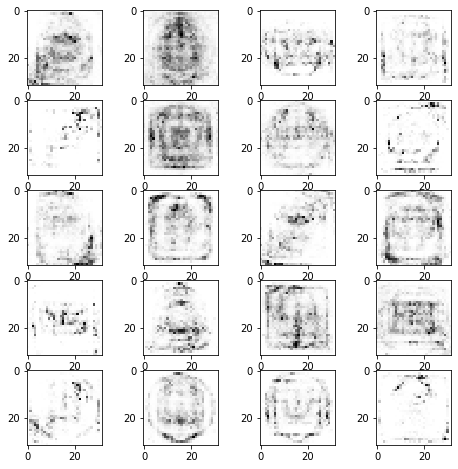


 36%|███▋      | 182/500 [07:42<16:47,  3.17s/it]

[181/500]: loss_d: 0.628592, loss_g: 2.704277



 37%|███▋      | 183/500 [07:44<15:09,  2.87s/it]

[182/500]: loss_d: 0.628099, loss_g: 2.706599



 37%|███▋      | 184/500 [07:46<14:30,  2.75s/it]

[183/500]: loss_d: 0.627795, loss_g: 2.708832



 37%|███▋      | 185/500 [07:49<14:21,  2.74s/it]

[184/500]: loss_d: 0.627567, loss_g: 2.710542



 37%|███▋      | 186/500 [07:52<14:09,  2.70s/it]

[185/500]: loss_d: 0.627343, loss_g: 2.712523



 37%|███▋      | 187/500 [07:55<14:28,  2.78s/it]

[186/500]: loss_d: 0.626757, loss_g: 2.715759



 38%|███▊      | 188/500 [07:57<13:21,  2.57s/it]

[187/500]: loss_d: 0.626434, loss_g: 2.718169



 38%|███▊      | 189/500 [07:59<13:10,  2.54s/it]

[188/500]: loss_d: 0.626091, loss_g: 2.720690



 38%|███▊      | 190/500 [08:02<13:00,  2.52s/it]

[189/500]: loss_d: 0.625816, loss_g: 2.723639
[190/500]: loss_d: 0.625294, loss_g: 2.726182


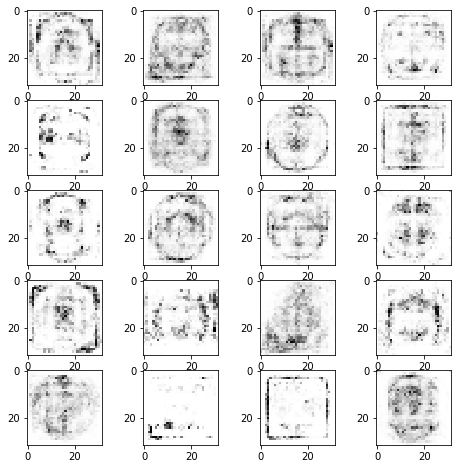


 38%|███▊      | 192/500 [08:08<14:45,  2.88s/it]

[191/500]: loss_d: 0.624933, loss_g: 2.728098



 39%|███▊      | 193/500 [08:11<14:01,  2.74s/it]

[192/500]: loss_d: 0.624599, loss_g: 2.730862



 39%|███▉      | 194/500 [08:13<13:08,  2.58s/it]

[193/500]: loss_d: 0.624256, loss_g: 2.733500



 39%|███▉      | 195/500 [08:15<12:44,  2.51s/it]

[194/500]: loss_d: 0.623793, loss_g: 2.735475



 39%|███▉      | 196/500 [08:18<13:00,  2.57s/it]

[195/500]: loss_d: 0.623449, loss_g: 2.737104



 39%|███▉      | 197/500 [08:21<12:54,  2.56s/it]

[196/500]: loss_d: 0.623126, loss_g: 2.739546



 40%|███▉      | 198/500 [08:23<12:31,  2.49s/it]

[197/500]: loss_d: 0.622670, loss_g: 2.742798



 40%|███▉      | 199/500 [08:25<11:52,  2.37s/it]

[198/500]: loss_d: 0.622365, loss_g: 2.746660



 40%|████      | 200/500 [08:27<11:26,  2.29s/it]

[199/500]: loss_d: 0.622180, loss_g: 2.749068
[200/500]: loss_d: 0.621845, loss_g: 2.752844


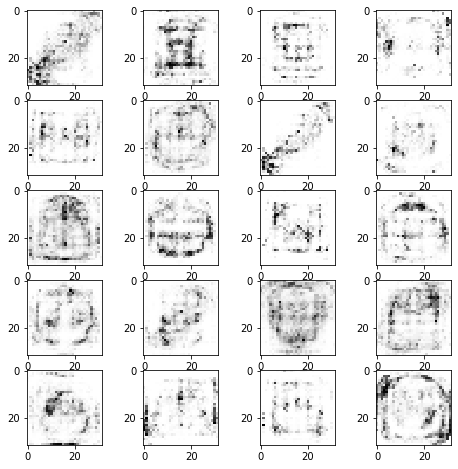


 40%|████      | 202/500 [08:33<12:25,  2.50s/it]

[201/500]: loss_d: 0.621525, loss_g: 2.755490



 41%|████      | 203/500 [08:35<11:45,  2.38s/it]

[202/500]: loss_d: 0.621394, loss_g: 2.758357



 41%|████      | 204/500 [08:37<11:18,  2.29s/it]

[203/500]: loss_d: 0.620975, loss_g: 2.760716



 41%|████      | 205/500 [08:39<10:58,  2.23s/it]

[204/500]: loss_d: 0.620743, loss_g: 2.762316



 41%|████      | 206/500 [08:41<10:44,  2.19s/it]

[205/500]: loss_d: 0.620298, loss_g: 2.764518



 41%|████▏     | 207/500 [08:43<10:45,  2.20s/it]

[206/500]: loss_d: 0.619850, loss_g: 2.767906



 42%|████▏     | 208/500 [08:46<10:58,  2.26s/it]

[207/500]: loss_d: 0.619495, loss_g: 2.770649



 42%|████▏     | 209/500 [08:48<10:57,  2.26s/it]

[208/500]: loss_d: 0.619399, loss_g: 2.773545



 42%|████▏     | 210/500 [08:50<10:52,  2.25s/it]

[209/500]: loss_d: 0.619132, loss_g: 2.776057
[210/500]: loss_d: 0.618790, loss_g: 2.779822


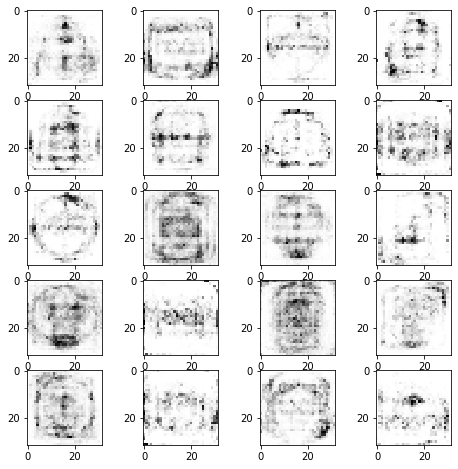


 42%|████▏     | 212/500 [08:56<12:23,  2.58s/it]

[211/500]: loss_d: 0.618430, loss_g: 2.782632



 43%|████▎     | 213/500 [08:59<11:47,  2.47s/it]

[212/500]: loss_d: 0.618301, loss_g: 2.785769



 43%|████▎     | 214/500 [09:01<12:16,  2.58s/it]

[213/500]: loss_d: 0.618032, loss_g: 2.787259



 43%|████▎     | 215/500 [09:04<12:10,  2.56s/it]

[214/500]: loss_d: 0.617731, loss_g: 2.788910



 43%|████▎     | 216/500 [09:07<12:05,  2.56s/it]

[215/500]: loss_d: 0.617234, loss_g: 2.791085



 43%|████▎     | 217/500 [09:10<13:23,  2.84s/it]

[216/500]: loss_d: 0.617164, loss_g: 2.791602



 44%|████▎     | 218/500 [09:12<12:36,  2.68s/it]

[217/500]: loss_d: 0.616964, loss_g: 2.793453



 44%|████▍     | 219/500 [09:15<12:50,  2.74s/it]

[218/500]: loss_d: 0.616856, loss_g: 2.795741



 44%|████▍     | 220/500 [09:18<12:42,  2.72s/it]

[219/500]: loss_d: 0.616679, loss_g: 2.798670
[220/500]: loss_d: 0.616776, loss_g: 2.801672


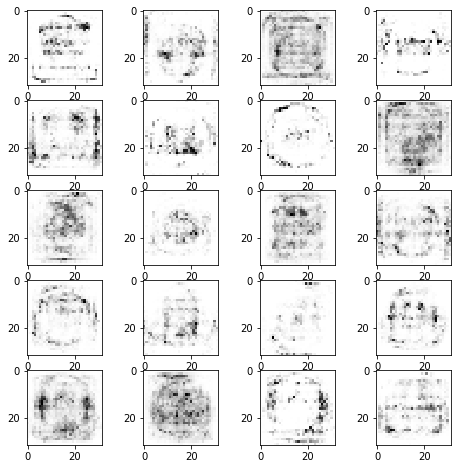


 44%|████▍     | 222/500 [09:24<13:25,  2.90s/it]

[221/500]: loss_d: 0.616644, loss_g: 2.804090



 45%|████▍     | 223/500 [09:27<12:40,  2.74s/it]

[222/500]: loss_d: 0.616426, loss_g: 2.806849



 45%|████▍     | 224/500 [09:29<11:45,  2.55s/it]

[223/500]: loss_d: 0.616049, loss_g: 2.808693



 45%|████▌     | 225/500 [09:31<11:09,  2.44s/it]

[224/500]: loss_d: 0.615908, loss_g: 2.810837



 45%|████▌     | 226/500 [09:33<10:39,  2.34s/it]

[225/500]: loss_d: 0.615608, loss_g: 2.812550



 45%|████▌     | 227/500 [09:35<10:18,  2.27s/it]

[226/500]: loss_d: 0.615466, loss_g: 2.814516



 46%|████▌     | 228/500 [09:37<10:05,  2.23s/it]

[227/500]: loss_d: 0.615248, loss_g: 2.815716



 46%|████▌     | 229/500 [09:40<10:54,  2.42s/it]

[228/500]: loss_d: 0.615149, loss_g: 2.818796



 46%|████▌     | 230/500 [09:43<11:21,  2.52s/it]

[229/500]: loss_d: 0.614954, loss_g: 2.820678
[230/500]: loss_d: 0.614591, loss_g: 2.822605


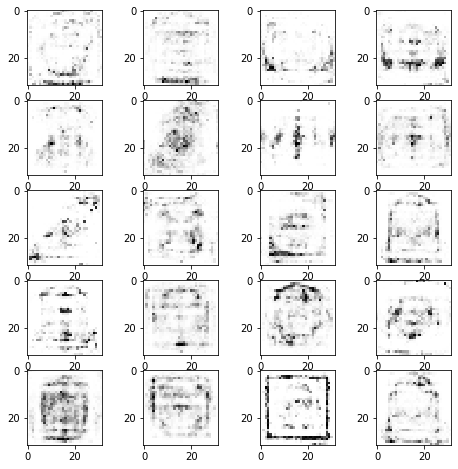


 46%|████▋     | 232/500 [09:49<12:16,  2.75s/it]

[231/500]: loss_d: 0.614358, loss_g: 2.823940



 47%|████▋     | 233/500 [09:52<11:37,  2.61s/it]

[232/500]: loss_d: 0.613985, loss_g: 2.825233



 47%|████▋     | 234/500 [09:54<11:00,  2.48s/it]

[233/500]: loss_d: 0.613897, loss_g: 2.827127



 47%|████▋     | 235/500 [09:56<10:36,  2.40s/it]

[234/500]: loss_d: 0.613478, loss_g: 2.829451



 47%|████▋     | 236/500 [09:58<10:33,  2.40s/it]

[235/500]: loss_d: 0.613108, loss_g: 2.831923



 47%|████▋     | 237/500 [10:01<10:22,  2.37s/it]

[236/500]: loss_d: 0.612710, loss_g: 2.834761



 48%|████▊     | 238/500 [10:03<09:57,  2.28s/it]

[237/500]: loss_d: 0.612494, loss_g: 2.836056



 48%|████▊     | 239/500 [10:05<09:39,  2.22s/it]

[238/500]: loss_d: 0.612132, loss_g: 2.838282



 48%|████▊     | 240/500 [10:07<09:27,  2.18s/it]

[239/500]: loss_d: 0.611858, loss_g: 2.840262
[240/500]: loss_d: 0.611583, loss_g: 2.841848


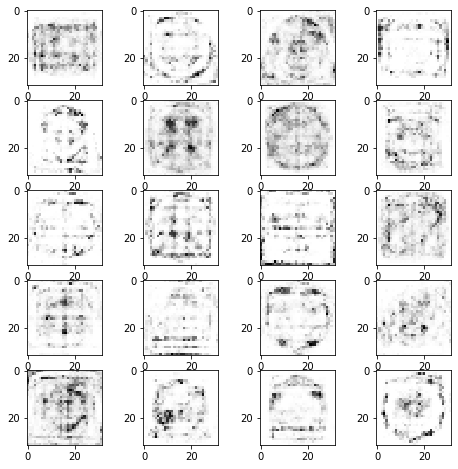


 48%|████▊     | 242/500 [10:13<11:12,  2.61s/it]

[241/500]: loss_d: 0.611348, loss_g: 2.844746



 49%|████▊     | 243/500 [10:15<10:42,  2.50s/it]

[242/500]: loss_d: 0.611177, loss_g: 2.847368



 49%|████▉     | 244/500 [10:18<10:37,  2.49s/it]

[243/500]: loss_d: 0.610952, loss_g: 2.849819



 49%|████▉     | 245/500 [10:21<11:03,  2.60s/it]

[244/500]: loss_d: 0.610646, loss_g: 2.851147



 49%|████▉     | 246/500 [10:23<10:57,  2.59s/it]

[245/500]: loss_d: 0.610522, loss_g: 2.852464



 49%|████▉     | 247/500 [10:26<10:33,  2.50s/it]

[246/500]: loss_d: 0.610497, loss_g: 2.854034



 50%|████▉     | 248/500 [10:28<10:08,  2.42s/it]

[247/500]: loss_d: 0.610482, loss_g: 2.855394



 50%|████▉     | 249/500 [10:30<09:52,  2.36s/it]

[248/500]: loss_d: 0.610207, loss_g: 2.857628



 50%|█████     | 250/500 [10:32<09:45,  2.34s/it]

[249/500]: loss_d: 0.610031, loss_g: 2.859059
[250/500]: loss_d: 0.609840, loss_g: 2.860118


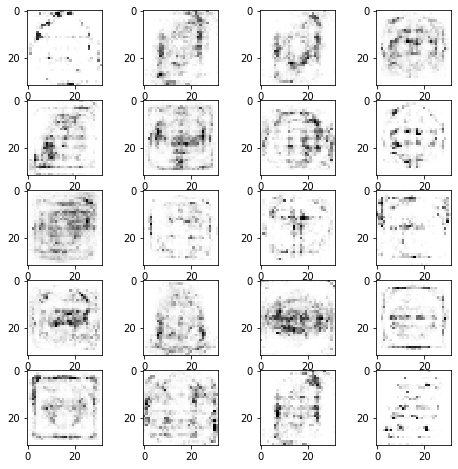


 50%|█████     | 252/500 [10:39<10:55,  2.64s/it]

[251/500]: loss_d: 0.609737, loss_g: 2.861165



 51%|█████     | 253/500 [10:41<10:24,  2.53s/it]

[252/500]: loss_d: 0.609710, loss_g: 2.863327



 51%|█████     | 254/500 [10:43<10:00,  2.44s/it]

[253/500]: loss_d: 0.609536, loss_g: 2.865077



 51%|█████     | 255/500 [10:45<09:42,  2.38s/it]

[254/500]: loss_d: 0.609346, loss_g: 2.867015



 51%|█████     | 256/500 [10:47<09:24,  2.31s/it]

[255/500]: loss_d: 0.609029, loss_g: 2.868986



 51%|█████▏    | 257/500 [10:50<09:18,  2.30s/it]

[256/500]: loss_d: 0.608817, loss_g: 2.871098



 52%|█████▏    | 258/500 [10:52<09:21,  2.32s/it]

[257/500]: loss_d: 0.608552, loss_g: 2.873591



 52%|█████▏    | 259/500 [10:54<09:11,  2.29s/it]

[258/500]: loss_d: 0.608268, loss_g: 2.875177



 52%|█████▏    | 260/500 [10:57<09:07,  2.28s/it]

[259/500]: loss_d: 0.607873, loss_g: 2.876598
[260/500]: loss_d: 0.607757, loss_g: 2.878835


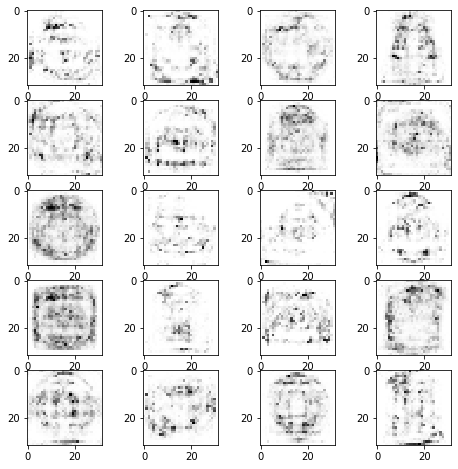


 52%|█████▏    | 262/500 [11:03<10:59,  2.77s/it]

[261/500]: loss_d: 0.607445, loss_g: 2.880673



 53%|█████▎    | 263/500 [11:06<10:16,  2.60s/it]

[262/500]: loss_d: 0.607202, loss_g: 2.881514



 53%|█████▎    | 264/500 [11:08<09:36,  2.44s/it]

[263/500]: loss_d: 0.607062, loss_g: 2.882421



 53%|█████▎    | 265/500 [11:10<09:09,  2.34s/it]

[264/500]: loss_d: 0.606864, loss_g: 2.883022



 53%|█████▎    | 266/500 [11:12<08:48,  2.26s/it]

[265/500]: loss_d: 0.606739, loss_g: 2.884122



 53%|█████▎    | 267/500 [11:14<08:32,  2.20s/it]

[266/500]: loss_d: 0.606553, loss_g: 2.886026



 54%|█████▎    | 268/500 [11:16<08:24,  2.17s/it]

[267/500]: loss_d: 0.606384, loss_g: 2.887712



 54%|█████▍    | 269/500 [11:18<08:16,  2.15s/it]

[268/500]: loss_d: 0.606310, loss_g: 2.889245



 54%|█████▍    | 270/500 [11:20<08:10,  2.13s/it]

[269/500]: loss_d: 0.606129, loss_g: 2.890728
[270/500]: loss_d: 0.605850, loss_g: 2.892010


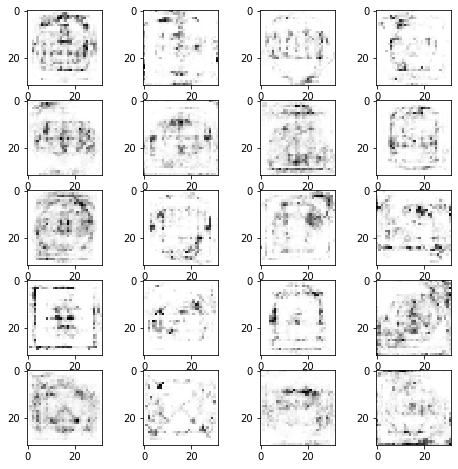


 54%|█████▍    | 272/500 [11:27<09:55,  2.61s/it]

[271/500]: loss_d: 0.605614, loss_g: 2.892820



 55%|█████▍    | 273/500 [11:29<09:23,  2.48s/it]

[272/500]: loss_d: 0.605352, loss_g: 2.894384



 55%|█████▍    | 274/500 [11:31<09:03,  2.41s/it]

[273/500]: loss_d: 0.605514, loss_g: 2.896763



 55%|█████▌    | 275/500 [11:33<08:48,  2.35s/it]

[274/500]: loss_d: 0.605303, loss_g: 2.898623



 55%|█████▌    | 276/500 [11:35<08:34,  2.30s/it]

[275/500]: loss_d: 0.604987, loss_g: 2.899606



 55%|█████▌    | 277/500 [11:38<08:22,  2.25s/it]

[276/500]: loss_d: 0.604823, loss_g: 2.901676



 56%|█████▌    | 278/500 [11:40<08:17,  2.24s/it]

[277/500]: loss_d: 0.604654, loss_g: 2.903604



 56%|█████▌    | 279/500 [11:42<08:11,  2.22s/it]

[278/500]: loss_d: 0.604417, loss_g: 2.904507



 56%|█████▌    | 280/500 [11:44<08:05,  2.21s/it]

[279/500]: loss_d: 0.604235, loss_g: 2.905230
[280/500]: loss_d: 0.604106, loss_g: 2.907131


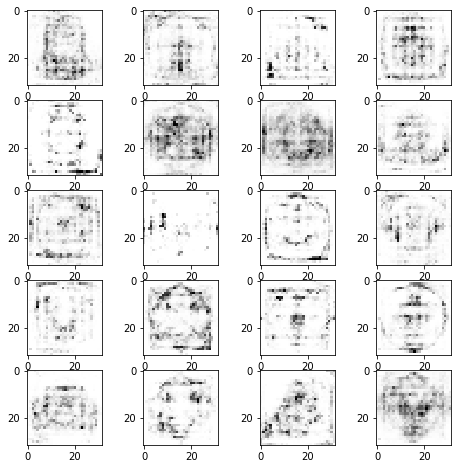


 56%|█████▋    | 282/500 [11:50<09:15,  2.55s/it]

[281/500]: loss_d: 0.604257, loss_g: 2.909416



 57%|█████▋    | 283/500 [11:52<08:48,  2.43s/it]

[282/500]: loss_d: 0.604130, loss_g: 2.911029



 57%|█████▋    | 284/500 [11:55<08:27,  2.35s/it]

[283/500]: loss_d: 0.604028, loss_g: 2.912015



 57%|█████▋    | 285/500 [11:57<08:12,  2.29s/it]

[284/500]: loss_d: 0.603903, loss_g: 2.914246



 57%|█████▋    | 286/500 [11:59<08:04,  2.26s/it]

[285/500]: loss_d: 0.603655, loss_g: 2.915442



 57%|█████▋    | 287/500 [12:01<07:54,  2.23s/it]

[286/500]: loss_d: 0.603399, loss_g: 2.916945



 58%|█████▊    | 288/500 [12:03<07:46,  2.20s/it]

[287/500]: loss_d: 0.603148, loss_g: 2.918316



 58%|█████▊    | 289/500 [12:05<07:45,  2.21s/it]

[288/500]: loss_d: 0.602842, loss_g: 2.919711



 58%|█████▊    | 290/500 [12:08<07:42,  2.20s/it]

[289/500]: loss_d: 0.602680, loss_g: 2.921192
[290/500]: loss_d: 0.602515, loss_g: 2.923029


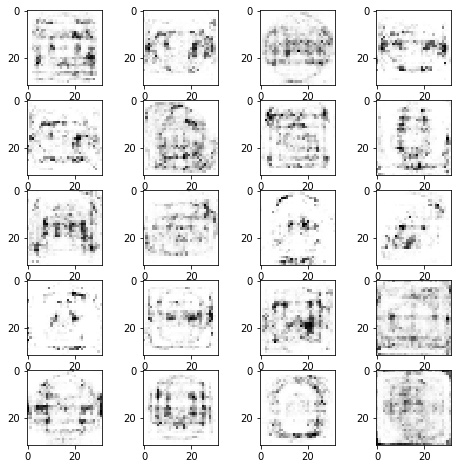


 58%|█████▊    | 292/500 [12:14<08:50,  2.55s/it]

[291/500]: loss_d: 0.602450, loss_g: 2.925168



 59%|█████▊    | 293/500 [12:16<08:22,  2.43s/it]

[292/500]: loss_d: 0.602319, loss_g: 2.925637



 59%|█████▉    | 294/500 [12:18<08:01,  2.34s/it]

[293/500]: loss_d: 0.602069, loss_g: 2.926384



 59%|█████▉    | 295/500 [12:20<07:49,  2.29s/it]

[294/500]: loss_d: 0.601923, loss_g: 2.927847



 59%|█████▉    | 296/500 [12:22<07:39,  2.25s/it]

[295/500]: loss_d: 0.601875, loss_g: 2.929801



 59%|█████▉    | 297/500 [12:24<07:29,  2.21s/it]

[296/500]: loss_d: 0.601978, loss_g: 2.932189



 60%|█████▉    | 298/500 [12:26<07:21,  2.19s/it]

[297/500]: loss_d: 0.601917, loss_g: 2.933650



 60%|█████▉    | 299/500 [12:29<07:15,  2.17s/it]

[298/500]: loss_d: 0.601726, loss_g: 2.934487



 60%|██████    | 300/500 [12:31<07:13,  2.17s/it]

[299/500]: loss_d: 0.601465, loss_g: 2.935579
[300/500]: loss_d: 0.601386, loss_g: 2.936302


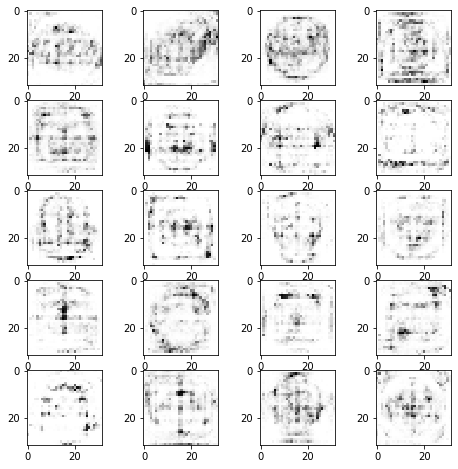


 60%|██████    | 302/500 [12:37<08:17,  2.51s/it]

[301/500]: loss_d: 0.601098, loss_g: 2.937610



 61%|██████    | 303/500 [12:39<07:53,  2.41s/it]

[302/500]: loss_d: 0.600938, loss_g: 2.938353



 61%|██████    | 304/500 [12:42<08:06,  2.48s/it]

[303/500]: loss_d: 0.600607, loss_g: 2.939627



 61%|██████    | 305/500 [12:44<07:54,  2.43s/it]

[304/500]: loss_d: 0.600492, loss_g: 2.941093



 61%|██████    | 306/500 [12:46<07:45,  2.40s/it]

[305/500]: loss_d: 0.600301, loss_g: 2.943470



 61%|██████▏   | 307/500 [12:49<07:42,  2.40s/it]

[306/500]: loss_d: 0.600197, loss_g: 2.945098



 62%|██████▏   | 308/500 [12:51<07:32,  2.36s/it]

[307/500]: loss_d: 0.599934, loss_g: 2.945954



 62%|██████▏   | 309/500 [12:53<07:21,  2.31s/it]

[308/500]: loss_d: 0.599657, loss_g: 2.947404



 62%|██████▏   | 310/500 [12:55<07:11,  2.27s/it]

[309/500]: loss_d: 0.599446, loss_g: 2.948430
[310/500]: loss_d: 0.599429, loss_g: 2.950264


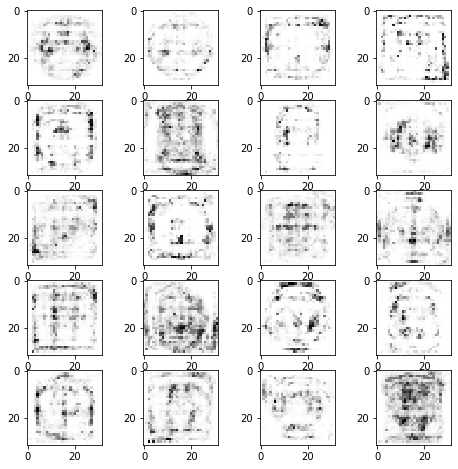


 62%|██████▏   | 312/500 [13:01<08:01,  2.56s/it]

[311/500]: loss_d: 0.599179, loss_g: 2.951261



 63%|██████▎   | 313/500 [13:03<07:37,  2.45s/it]

[312/500]: loss_d: 0.598929, loss_g: 2.952562



 63%|██████▎   | 314/500 [13:06<07:23,  2.38s/it]

[313/500]: loss_d: 0.598628, loss_g: 2.953768



 63%|██████▎   | 315/500 [13:08<07:11,  2.33s/it]

[314/500]: loss_d: 0.598441, loss_g: 2.955255



 63%|██████▎   | 316/500 [13:10<07:01,  2.29s/it]

[315/500]: loss_d: 0.598358, loss_g: 2.955374



 63%|██████▎   | 317/500 [13:12<06:49,  2.24s/it]

[316/500]: loss_d: 0.598167, loss_g: 2.956096



 64%|██████▎   | 318/500 [13:14<06:44,  2.22s/it]

[317/500]: loss_d: 0.598068, loss_g: 2.958123



 64%|██████▍   | 319/500 [13:16<06:38,  2.20s/it]

[318/500]: loss_d: 0.598188, loss_g: 2.959735



 64%|██████▍   | 320/500 [13:19<06:33,  2.19s/it]

[319/500]: loss_d: 0.598074, loss_g: 2.961389
[320/500]: loss_d: 0.597932, loss_g: 2.962135


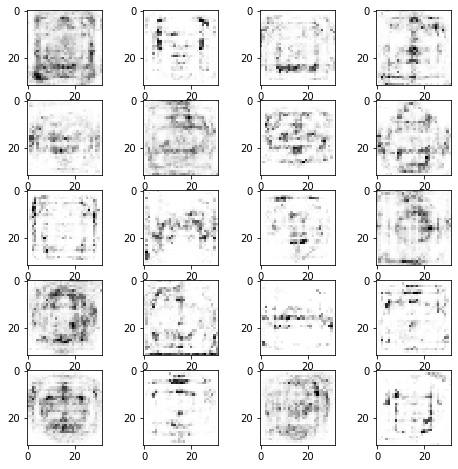


 64%|██████▍   | 322/500 [13:25<07:26,  2.51s/it]

[321/500]: loss_d: 0.597780, loss_g: 2.963782



 65%|██████▍   | 323/500 [13:27<07:04,  2.40s/it]

[322/500]: loss_d: 0.597481, loss_g: 2.965502



 65%|██████▍   | 324/500 [13:29<06:52,  2.35s/it]

[323/500]: loss_d: 0.597358, loss_g: 2.966397



 65%|██████▌   | 325/500 [13:31<06:44,  2.31s/it]

[324/500]: loss_d: 0.597226, loss_g: 2.967298



 65%|██████▌   | 326/500 [13:33<06:33,  2.26s/it]

[325/500]: loss_d: 0.597067, loss_g: 2.968420



 65%|██████▌   | 327/500 [13:36<06:27,  2.24s/it]

[326/500]: loss_d: 0.596961, loss_g: 2.968980



 66%|██████▌   | 328/500 [13:38<06:23,  2.23s/it]

[327/500]: loss_d: 0.596767, loss_g: 2.970448



 66%|██████▌   | 329/500 [13:40<06:27,  2.27s/it]

[328/500]: loss_d: 0.596577, loss_g: 2.971162



 66%|██████▌   | 330/500 [13:43<06:36,  2.33s/it]

[329/500]: loss_d: 0.596395, loss_g: 2.971486
[330/500]: loss_d: 0.596208, loss_g: 2.971789


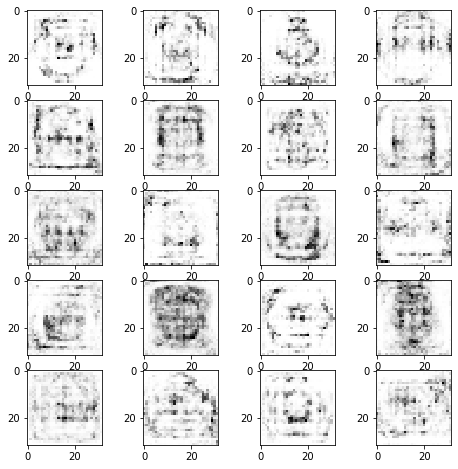


 66%|██████▋   | 332/500 [13:49<07:41,  2.75s/it]

[331/500]: loss_d: 0.596031, loss_g: 2.972554



 67%|██████▋   | 333/500 [13:51<07:22,  2.65s/it]

[332/500]: loss_d: 0.595920, loss_g: 2.973016



 67%|██████▋   | 334/500 [13:54<07:17,  2.64s/it]

[333/500]: loss_d: 0.595775, loss_g: 2.973643



 67%|██████▋   | 335/500 [13:57<07:06,  2.58s/it]

[334/500]: loss_d: 0.595647, loss_g: 2.974132



 67%|██████▋   | 336/500 [13:59<07:08,  2.61s/it]

[335/500]: loss_d: 0.595641, loss_g: 2.974849



 67%|██████▋   | 337/500 [14:02<07:01,  2.59s/it]

[336/500]: loss_d: 0.595461, loss_g: 2.976980



 68%|██████▊   | 338/500 [14:04<06:39,  2.46s/it]

[337/500]: loss_d: 0.595489, loss_g: 2.978424



 68%|██████▊   | 339/500 [14:07<06:51,  2.56s/it]

[338/500]: loss_d: 0.595482, loss_g: 2.979232



 68%|██████▊   | 340/500 [14:09<06:39,  2.50s/it]

[339/500]: loss_d: 0.595384, loss_g: 2.979297
[340/500]: loss_d: 0.595302, loss_g: 2.979852


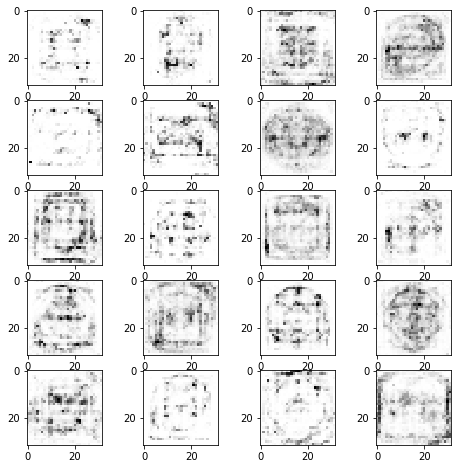


 68%|██████▊   | 342/500 [14:15<06:51,  2.61s/it]

[341/500]: loss_d: 0.595074, loss_g: 2.981001



 69%|██████▊   | 343/500 [14:17<06:24,  2.45s/it]

[342/500]: loss_d: 0.595039, loss_g: 2.981964



 69%|██████▉   | 344/500 [14:19<06:04,  2.34s/it]

[343/500]: loss_d: 0.594919, loss_g: 2.982969



 69%|██████▉   | 345/500 [14:21<05:51,  2.27s/it]

[344/500]: loss_d: 0.594784, loss_g: 2.983141



 69%|██████▉   | 346/500 [14:23<05:40,  2.21s/it]

[345/500]: loss_d: 0.594744, loss_g: 2.984483



 69%|██████▉   | 347/500 [14:25<05:46,  2.27s/it]

[346/500]: loss_d: 0.594694, loss_g: 2.985870



 70%|██████▉   | 348/500 [14:28<05:40,  2.24s/it]

[347/500]: loss_d: 0.594629, loss_g: 2.986403



 70%|██████▉   | 349/500 [14:30<05:35,  2.22s/it]

[348/500]: loss_d: 0.594443, loss_g: 2.987228



 70%|███████   | 350/500 [14:32<05:29,  2.20s/it]

[349/500]: loss_d: 0.594254, loss_g: 2.988099
[350/500]: loss_d: 0.594066, loss_g: 2.988921


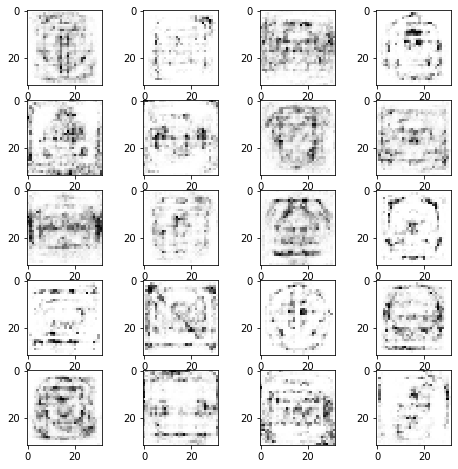


 70%|███████   | 352/500 [14:38<06:18,  2.56s/it]

[351/500]: loss_d: 0.593910, loss_g: 2.989512



 71%|███████   | 353/500 [14:40<06:01,  2.46s/it]

[352/500]: loss_d: 0.593738, loss_g: 2.990483



 71%|███████   | 354/500 [14:42<05:44,  2.36s/it]

[353/500]: loss_d: 0.593641, loss_g: 2.991076



 71%|███████   | 355/500 [14:45<05:52,  2.43s/it]

[354/500]: loss_d: 0.593498, loss_g: 2.991592



 71%|███████   | 356/500 [14:47<05:44,  2.39s/it]

[355/500]: loss_d: 0.593430, loss_g: 2.992106



 71%|███████▏  | 357/500 [14:50<05:47,  2.43s/it]

[356/500]: loss_d: 0.593393, loss_g: 2.992790



 72%|███████▏  | 358/500 [14:52<05:51,  2.47s/it]

[357/500]: loss_d: 0.593276, loss_g: 2.993553



 72%|███████▏  | 359/500 [14:55<05:56,  2.53s/it]

[358/500]: loss_d: 0.593164, loss_g: 2.994058



 72%|███████▏  | 360/500 [14:58<06:18,  2.71s/it]

[359/500]: loss_d: 0.593197, loss_g: 2.994333
[360/500]: loss_d: 0.593120, loss_g: 2.995497


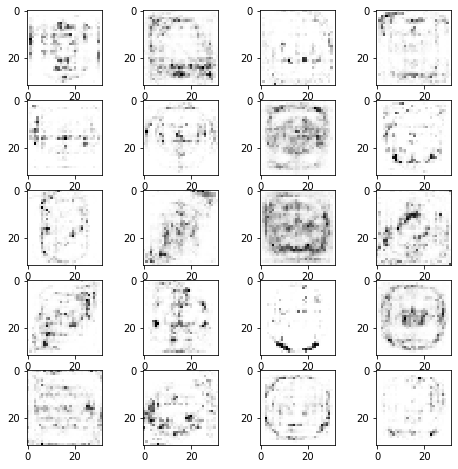


 72%|███████▏  | 362/500 [15:04<06:32,  2.84s/it]

[361/500]: loss_d: 0.593137, loss_g: 2.996242



 73%|███████▎  | 363/500 [15:07<06:01,  2.64s/it]

[362/500]: loss_d: 0.593022, loss_g: 2.996569



 73%|███████▎  | 364/500 [15:09<05:46,  2.55s/it]

[363/500]: loss_d: 0.592908, loss_g: 2.996995



 73%|███████▎  | 365/500 [15:12<05:52,  2.61s/it]

[364/500]: loss_d: 0.592926, loss_g: 2.997475



 73%|███████▎  | 366/500 [15:14<05:40,  2.54s/it]

[365/500]: loss_d: 0.592786, loss_g: 2.997865



 73%|███████▎  | 367/500 [15:16<05:30,  2.49s/it]

[366/500]: loss_d: 0.592785, loss_g: 2.998214



 74%|███████▎  | 368/500 [15:19<05:33,  2.53s/it]

[367/500]: loss_d: 0.592706, loss_g: 2.999514



 74%|███████▍  | 369/500 [15:21<05:17,  2.43s/it]

[368/500]: loss_d: 0.592673, loss_g: 3.000341



 74%|███████▍  | 370/500 [15:24<05:12,  2.41s/it]

[369/500]: loss_d: 0.592549, loss_g: 3.001163
[370/500]: loss_d: 0.592405, loss_g: 3.002022


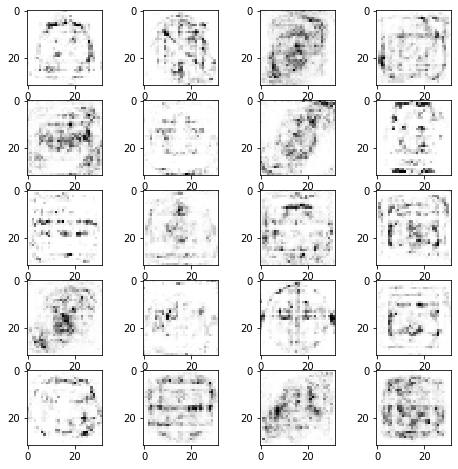


 74%|███████▍  | 372/500 [15:31<06:11,  2.90s/it]

[371/500]: loss_d: 0.592242, loss_g: 3.002691



 75%|███████▍  | 373/500 [15:34<06:09,  2.91s/it]

[372/500]: loss_d: 0.592093, loss_g: 3.003181



 75%|███████▍  | 374/500 [15:36<05:43,  2.73s/it]

[373/500]: loss_d: 0.591951, loss_g: 3.003733



 75%|███████▌  | 375/500 [15:38<05:25,  2.60s/it]

[374/500]: loss_d: 0.591761, loss_g: 3.004204



 75%|███████▌  | 376/500 [15:41<05:13,  2.53s/it]

[375/500]: loss_d: 0.591616, loss_g: 3.004555



 75%|███████▌  | 377/500 [15:43<05:13,  2.55s/it]

[376/500]: loss_d: 0.591501, loss_g: 3.004790



 76%|███████▌  | 378/500 [15:46<05:06,  2.51s/it]

[377/500]: loss_d: 0.591412, loss_g: 3.005269



 76%|███████▌  | 379/500 [15:48<04:54,  2.43s/it]

[378/500]: loss_d: 0.591364, loss_g: 3.005815



 76%|███████▌  | 380/500 [15:51<05:11,  2.59s/it]

[379/500]: loss_d: 0.591264, loss_g: 3.006240
[380/500]: loss_d: 0.591158, loss_g: 3.006262


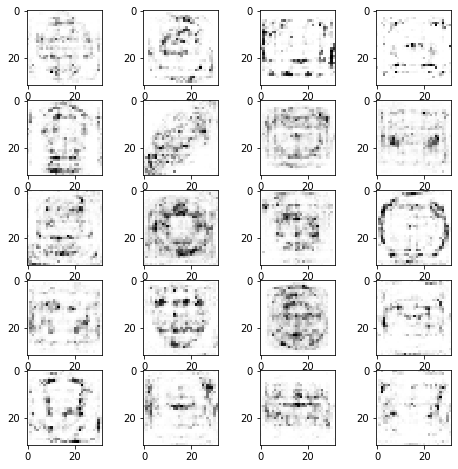


 76%|███████▋  | 382/500 [15:59<06:11,  3.15s/it]

[381/500]: loss_d: 0.591009, loss_g: 3.006730



 77%|███████▋  | 383/500 [16:02<05:59,  3.07s/it]

[382/500]: loss_d: 0.590946, loss_g: 3.007021



 77%|███████▋  | 384/500 [16:04<05:48,  3.00s/it]

[383/500]: loss_d: 0.590931, loss_g: 3.007650



 77%|███████▋  | 385/500 [16:07<05:25,  2.83s/it]

[384/500]: loss_d: 0.590845, loss_g: 3.007973



 77%|███████▋  | 386/500 [16:10<05:20,  2.81s/it]

[385/500]: loss_d: 0.590787, loss_g: 3.008308



 77%|███████▋  | 387/500 [16:13<05:19,  2.83s/it]

[386/500]: loss_d: 0.590677, loss_g: 3.008679



 78%|███████▊  | 388/500 [16:15<05:03,  2.71s/it]

[387/500]: loss_d: 0.590672, loss_g: 3.009289



 78%|███████▊  | 389/500 [16:18<04:55,  2.66s/it]

[388/500]: loss_d: 0.590527, loss_g: 3.009591



 78%|███████▊  | 390/500 [16:20<04:37,  2.52s/it]

[389/500]: loss_d: 0.590486, loss_g: 3.010557
[390/500]: loss_d: 0.590465, loss_g: 3.010999


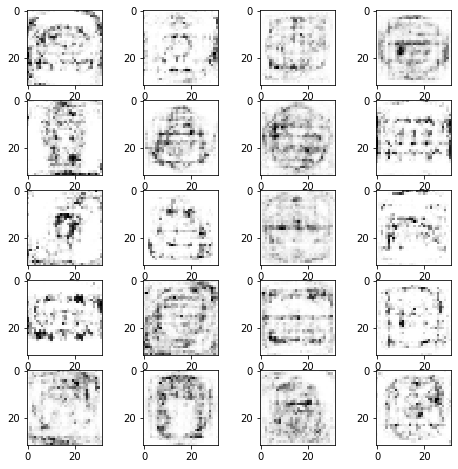


 78%|███████▊  | 392/500 [16:27<05:17,  2.94s/it]

[391/500]: loss_d: 0.590384, loss_g: 3.011355



 79%|███████▊  | 393/500 [16:29<04:53,  2.75s/it]

[392/500]: loss_d: 0.590349, loss_g: 3.011779



 79%|███████▉  | 394/500 [16:32<04:40,  2.64s/it]

[393/500]: loss_d: 0.590243, loss_g: 3.012210



 79%|███████▉  | 395/500 [16:35<04:49,  2.76s/it]

[394/500]: loss_d: 0.590228, loss_g: 3.012748



 79%|███████▉  | 396/500 [16:37<04:50,  2.79s/it]

[395/500]: loss_d: 0.590094, loss_g: 3.013583



 79%|███████▉  | 397/500 [16:40<04:38,  2.70s/it]

[396/500]: loss_d: 0.590132, loss_g: 3.014189



 80%|███████▉  | 398/500 [16:42<04:21,  2.56s/it]

[397/500]: loss_d: 0.590032, loss_g: 3.014712



 80%|███████▉  | 399/500 [16:44<04:11,  2.49s/it]

[398/500]: loss_d: 0.589957, loss_g: 3.015164



 80%|████████  | 400/500 [16:47<04:01,  2.41s/it]

[399/500]: loss_d: 0.589862, loss_g: 3.015841
[400/500]: loss_d: 0.589760, loss_g: 3.016427


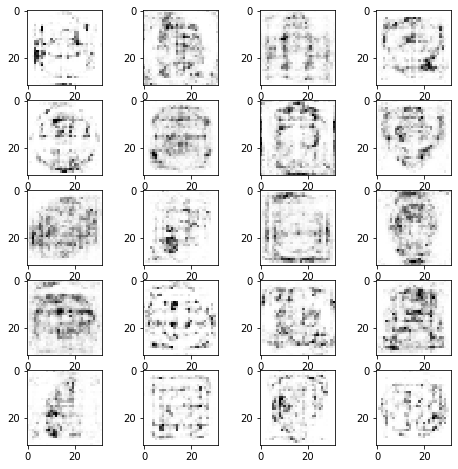


 80%|████████  | 402/500 [16:53<04:31,  2.77s/it]

[401/500]: loss_d: 0.589643, loss_g: 3.016548



 81%|████████  | 403/500 [16:56<04:17,  2.66s/it]

[402/500]: loss_d: 0.589569, loss_g: 3.017094



 81%|████████  | 404/500 [16:58<04:03,  2.54s/it]

[403/500]: loss_d: 0.589553, loss_g: 3.017720



 81%|████████  | 405/500 [17:00<03:52,  2.45s/it]

[404/500]: loss_d: 0.589453, loss_g: 3.017761



 81%|████████  | 406/500 [17:02<03:40,  2.35s/it]

[405/500]: loss_d: 0.589343, loss_g: 3.017804



 81%|████████▏ | 407/500 [17:04<03:35,  2.32s/it]

[406/500]: loss_d: 0.589339, loss_g: 3.018256



 82%|████████▏ | 408/500 [17:07<03:27,  2.26s/it]

[407/500]: loss_d: 0.589255, loss_g: 3.018995



 82%|████████▏ | 409/500 [17:09<03:27,  2.28s/it]

[408/500]: loss_d: 0.589189, loss_g: 3.019276



 82%|████████▏ | 410/500 [17:11<03:22,  2.25s/it]

[409/500]: loss_d: 0.589117, loss_g: 3.019785
[410/500]: loss_d: 0.589017, loss_g: 3.019888


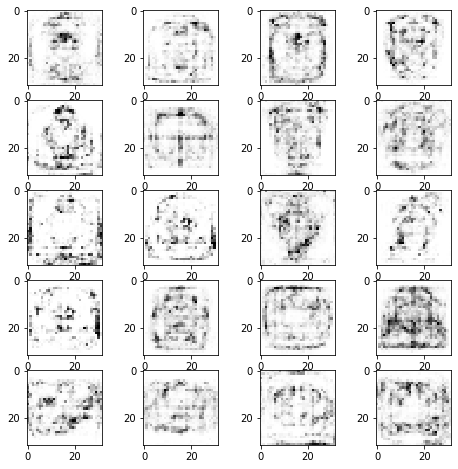


 82%|████████▏ | 412/500 [17:17<03:51,  2.63s/it]

[411/500]: loss_d: 0.588894, loss_g: 3.020041



 83%|████████▎ | 413/500 [17:20<03:44,  2.58s/it]

[412/500]: loss_d: 0.588753, loss_g: 3.020096



 83%|████████▎ | 414/500 [17:22<03:39,  2.55s/it]

[413/500]: loss_d: 0.588765, loss_g: 3.020517



 83%|████████▎ | 415/500 [17:25<03:31,  2.48s/it]

[414/500]: loss_d: 0.588614, loss_g: 3.021420



 83%|████████▎ | 416/500 [17:27<03:22,  2.41s/it]

[415/500]: loss_d: 0.588449, loss_g: 3.021864



 83%|████████▎ | 417/500 [17:30<03:32,  2.56s/it]

[416/500]: loss_d: 0.588357, loss_g: 3.022433



 84%|████████▎ | 418/500 [17:33<03:37,  2.65s/it]

[417/500]: loss_d: 0.588270, loss_g: 3.022881



 84%|████████▍ | 419/500 [17:35<03:23,  2.52s/it]

[418/500]: loss_d: 0.588244, loss_g: 3.023901



 84%|████████▍ | 420/500 [17:37<03:18,  2.48s/it]

[419/500]: loss_d: 0.588167, loss_g: 3.024117
[420/500]: loss_d: 0.588096, loss_g: 3.024418


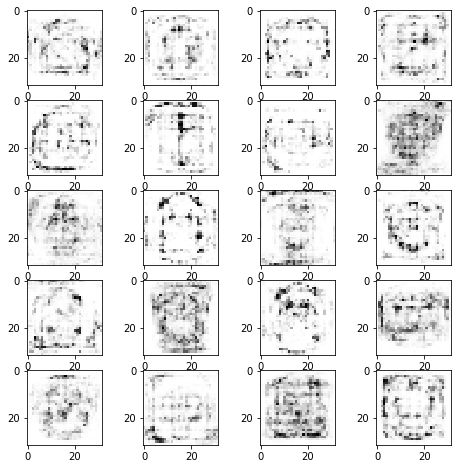


 84%|████████▍ | 422/500 [17:44<03:41,  2.84s/it]

[421/500]: loss_d: 0.588003, loss_g: 3.024665



 85%|████████▍ | 423/500 [17:46<03:26,  2.68s/it]

[422/500]: loss_d: 0.587979, loss_g: 3.025175



 85%|████████▍ | 424/500 [17:48<03:12,  2.53s/it]

[423/500]: loss_d: 0.587872, loss_g: 3.025669



 85%|████████▌ | 425/500 [17:50<03:00,  2.40s/it]

[424/500]: loss_d: 0.587662, loss_g: 3.026411



 85%|████████▌ | 426/500 [17:53<02:51,  2.32s/it]

[425/500]: loss_d: 0.587584, loss_g: 3.026731



 85%|████████▌ | 427/500 [17:55<02:44,  2.25s/it]

[426/500]: loss_d: 0.587441, loss_g: 3.027523



 86%|████████▌ | 428/500 [17:57<02:38,  2.20s/it]

[427/500]: loss_d: 0.587389, loss_g: 3.028625



 86%|████████▌ | 429/500 [17:59<02:33,  2.16s/it]

[428/500]: loss_d: 0.587337, loss_g: 3.029121



 86%|████████▌ | 430/500 [18:01<02:36,  2.24s/it]

[429/500]: loss_d: 0.587224, loss_g: 3.029116
[430/500]: loss_d: 0.587181, loss_g: 3.030090


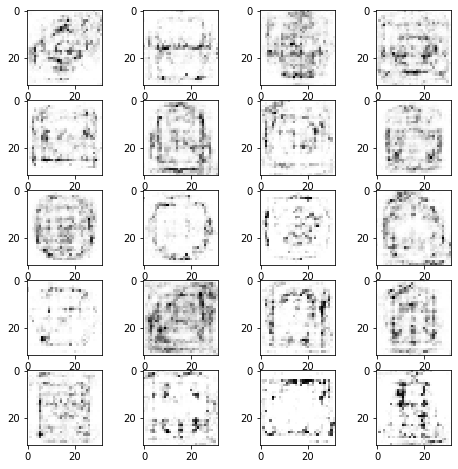


 86%|████████▋ | 432/500 [18:07<02:56,  2.59s/it]

[431/500]: loss_d: 0.587107, loss_g: 3.030503



 87%|████████▋ | 433/500 [18:10<02:47,  2.51s/it]

[432/500]: loss_d: 0.586997, loss_g: 3.031131



 87%|████████▋ | 434/500 [18:12<02:42,  2.46s/it]

[433/500]: loss_d: 0.586837, loss_g: 3.031754



 87%|████████▋ | 435/500 [18:14<02:33,  2.36s/it]

[434/500]: loss_d: 0.586780, loss_g: 3.032187



 87%|████████▋ | 436/500 [18:16<02:27,  2.31s/it]

[435/500]: loss_d: 0.586658, loss_g: 3.032798



 87%|████████▋ | 437/500 [18:19<02:25,  2.31s/it]

[436/500]: loss_d: 0.586573, loss_g: 3.033413



 88%|████████▊ | 438/500 [18:21<02:26,  2.36s/it]

[437/500]: loss_d: 0.586478, loss_g: 3.034331



 88%|████████▊ | 439/500 [18:24<02:24,  2.38s/it]

[438/500]: loss_d: 0.586373, loss_g: 3.035141



 88%|████████▊ | 440/500 [18:26<02:21,  2.36s/it]

[439/500]: loss_d: 0.586316, loss_g: 3.035569
[440/500]: loss_d: 0.586208, loss_g: 3.036011


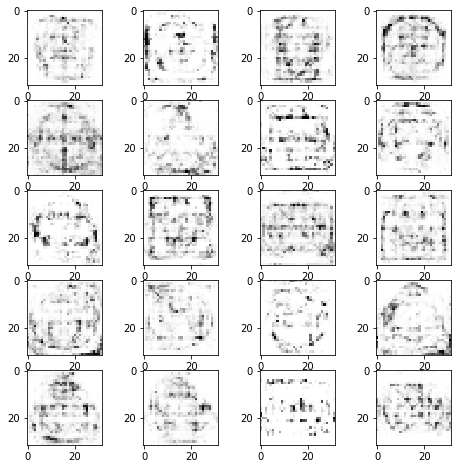


 88%|████████▊ | 442/500 [18:32<02:33,  2.65s/it]

[441/500]: loss_d: 0.586074, loss_g: 3.036660



 89%|████████▊ | 443/500 [18:35<02:29,  2.63s/it]

[442/500]: loss_d: 0.585937, loss_g: 3.036927



 89%|████████▉ | 444/500 [18:37<02:22,  2.54s/it]

[443/500]: loss_d: 0.585825, loss_g: 3.037356



 89%|████████▉ | 445/500 [18:39<02:13,  2.42s/it]

[444/500]: loss_d: 0.585731, loss_g: 3.038715



 89%|████████▉ | 446/500 [18:41<02:06,  2.35s/it]

[445/500]: loss_d: 0.585653, loss_g: 3.039318



 89%|████████▉ | 447/500 [18:43<02:02,  2.30s/it]

[446/500]: loss_d: 0.585512, loss_g: 3.039668



 90%|████████▉ | 448/500 [18:46<01:57,  2.26s/it]

[447/500]: loss_d: 0.585362, loss_g: 3.040147



 90%|████████▉ | 449/500 [18:48<01:55,  2.26s/it]

[448/500]: loss_d: 0.585243, loss_g: 3.040663



 90%|█████████ | 450/500 [18:50<01:55,  2.32s/it]

[449/500]: loss_d: 0.585145, loss_g: 3.040761
[450/500]: loss_d: 0.585044, loss_g: 3.041041


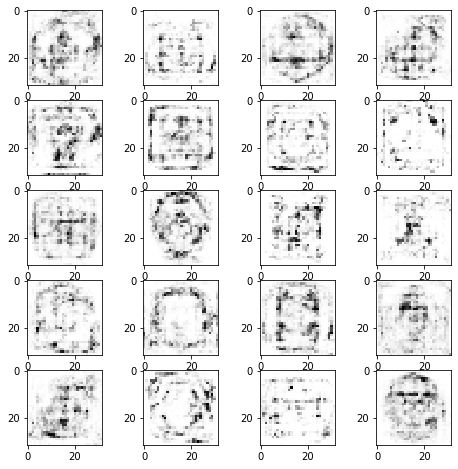


 90%|█████████ | 452/500 [18:57<02:11,  2.73s/it]

[451/500]: loss_d: 0.584959, loss_g: 3.041937



 91%|█████████ | 453/500 [18:59<02:05,  2.67s/it]

[452/500]: loss_d: 0.584796, loss_g: 3.042605



 91%|█████████ | 454/500 [19:02<01:59,  2.61s/it]

[453/500]: loss_d: 0.584646, loss_g: 3.043117



 91%|█████████ | 455/500 [19:04<01:51,  2.47s/it]

[454/500]: loss_d: 0.584489, loss_g: 3.043839



 91%|█████████ | 456/500 [19:06<01:46,  2.42s/it]

[455/500]: loss_d: 0.584310, loss_g: 3.044193



 91%|█████████▏| 457/500 [19:09<01:40,  2.34s/it]

[456/500]: loss_d: 0.584194, loss_g: 3.045593



 92%|█████████▏| 458/500 [19:11<01:38,  2.34s/it]

[457/500]: loss_d: 0.584147, loss_g: 3.045859



 92%|█████████▏| 459/500 [19:14<01:39,  2.43s/it]

[458/500]: loss_d: 0.584011, loss_g: 3.046450



 92%|█████████▏| 460/500 [19:16<01:35,  2.38s/it]

[459/500]: loss_d: 0.583899, loss_g: 3.047219
[460/500]: loss_d: 0.583787, loss_g: 3.047342


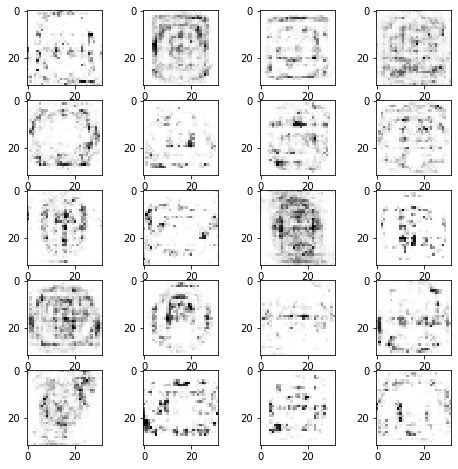


 92%|█████████▏| 462/500 [19:23<01:47,  2.84s/it]

[461/500]: loss_d: 0.583628, loss_g: 3.047919



 93%|█████████▎| 463/500 [19:25<01:38,  2.67s/it]

[462/500]: loss_d: 0.583505, loss_g: 3.048841



 93%|█████████▎| 464/500 [19:27<01:31,  2.53s/it]

[463/500]: loss_d: 0.583400, loss_g: 3.049762



 93%|█████████▎| 465/500 [19:29<01:24,  2.41s/it]

[464/500]: loss_d: 0.583299, loss_g: 3.051048



 93%|█████████▎| 466/500 [19:32<01:20,  2.36s/it]

[465/500]: loss_d: 0.583207, loss_g: 3.051965



 93%|█████████▎| 467/500 [19:34<01:18,  2.37s/it]

[466/500]: loss_d: 0.583044, loss_g: 3.052798



 94%|█████████▎| 468/500 [19:36<01:14,  2.33s/it]

[467/500]: loss_d: 0.582897, loss_g: 3.053511



 94%|█████████▍| 469/500 [19:38<01:11,  2.30s/it]

[468/500]: loss_d: 0.582708, loss_g: 3.054845



 94%|█████████▍| 470/500 [19:41<01:07,  2.26s/it]

[469/500]: loss_d: 0.582531, loss_g: 3.055795
[470/500]: loss_d: 0.582473, loss_g: 3.056166


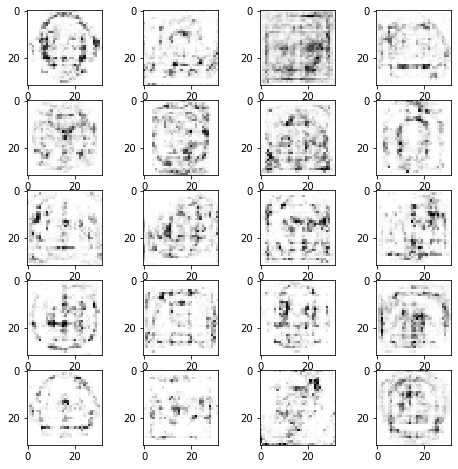


 94%|█████████▍| 472/500 [19:47<01:12,  2.58s/it]

[471/500]: loss_d: 0.582304, loss_g: 3.056756



 95%|█████████▍| 473/500 [19:49<01:06,  2.45s/it]

[472/500]: loss_d: 0.582087, loss_g: 3.057602



 95%|█████████▍| 474/500 [19:51<01:02,  2.39s/it]

[473/500]: loss_d: 0.581880, loss_g: 3.058205



 95%|█████████▌| 475/500 [19:53<00:58,  2.33s/it]

[474/500]: loss_d: 0.581672, loss_g: 3.058753



 95%|█████████▌| 476/500 [19:55<00:54,  2.28s/it]

[475/500]: loss_d: 0.581458, loss_g: 3.059324



 95%|█████████▌| 477/500 [19:58<00:51,  2.25s/it]

[476/500]: loss_d: 0.581323, loss_g: 3.060157



 96%|█████████▌| 478/500 [20:00<00:48,  2.21s/it]

[477/500]: loss_d: 0.581196, loss_g: 3.060900



 96%|█████████▌| 479/500 [20:02<00:46,  2.20s/it]

[478/500]: loss_d: 0.581084, loss_g: 3.062016



 96%|█████████▌| 480/500 [20:04<00:43,  2.19s/it]

[479/500]: loss_d: 0.580957, loss_g: 3.062613
[480/500]: loss_d: 0.580773, loss_g: 3.063061


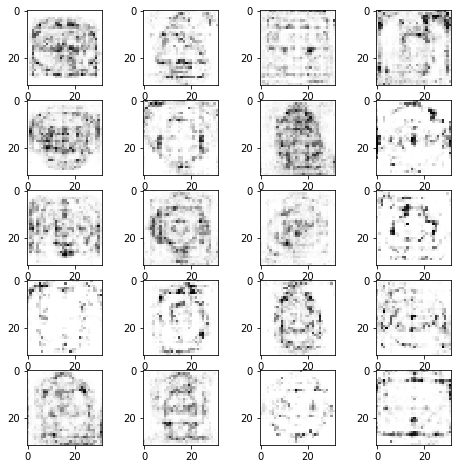


 96%|█████████▋| 482/500 [20:11<00:47,  2.63s/it]

[481/500]: loss_d: 0.580640, loss_g: 3.063962



 97%|█████████▋| 483/500 [20:13<00:43,  2.56s/it]

[482/500]: loss_d: 0.580511, loss_g: 3.064676



 97%|█████████▋| 484/500 [20:15<00:40,  2.53s/it]

[483/500]: loss_d: 0.580383, loss_g: 3.065191



 97%|█████████▋| 485/500 [20:18<00:36,  2.46s/it]

[484/500]: loss_d: 0.580272, loss_g: 3.066010



 97%|█████████▋| 486/500 [20:20<00:34,  2.47s/it]

[485/500]: loss_d: 0.580167, loss_g: 3.067218



 97%|█████████▋| 487/500 [20:22<00:31,  2.41s/it]

[486/500]: loss_d: 0.579999, loss_g: 3.067708



 98%|█████████▊| 488/500 [20:25<00:28,  2.39s/it]

[487/500]: loss_d: 0.579813, loss_g: 3.068300



 98%|█████████▊| 489/500 [20:27<00:25,  2.33s/it]

[488/500]: loss_d: 0.579718, loss_g: 3.068888



 98%|█████████▊| 490/500 [20:29<00:22,  2.27s/it]

[489/500]: loss_d: 0.579531, loss_g: 3.069337
[490/500]: loss_d: 0.579397, loss_g: 3.069834


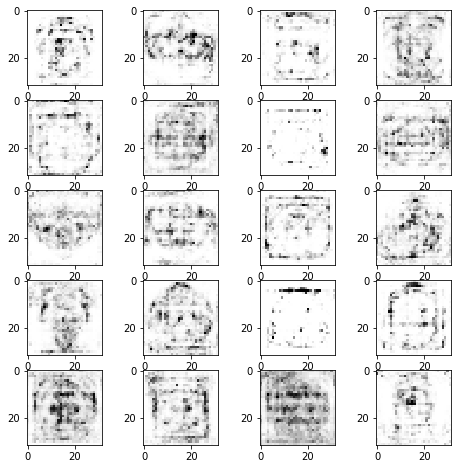


 98%|█████████▊| 492/500 [20:35<00:20,  2.57s/it]

[491/500]: loss_d: 0.579242, loss_g: 3.070161



 99%|█████████▊| 493/500 [20:37<00:17,  2.45s/it]

[492/500]: loss_d: 0.579143, loss_g: 3.070404



 99%|█████████▉| 494/500 [20:39<00:14,  2.36s/it]

[493/500]: loss_d: 0.578977, loss_g: 3.071426



 99%|█████████▉| 495/500 [20:42<00:11,  2.29s/it]

[494/500]: loss_d: 0.578853, loss_g: 3.072571



 99%|█████████▉| 496/500 [20:44<00:08,  2.25s/it]

[495/500]: loss_d: 0.578723, loss_g: 3.074019



 99%|█████████▉| 497/500 [20:46<00:06,  2.24s/it]

[496/500]: loss_d: 0.578677, loss_g: 3.074848



100%|█████████▉| 498/500 [20:48<00:04,  2.22s/it]

[497/500]: loss_d: 0.578513, loss_g: 3.076011



100%|█████████▉| 499/500 [20:50<00:02,  2.21s/it]

[498/500]: loss_d: 0.578375, loss_g: 3.076934



100%|██████████| 500/500 [20:52<00:00,  2.51s/it]

[499/500]: loss_d: 0.578159, loss_g: 3.077655


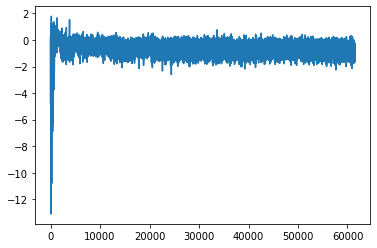

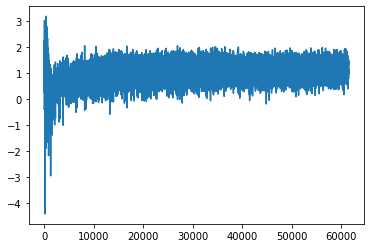

In [12]:
from tqdm import tqdm
D_losses, G_losses = [], []
z_dim = 200
G = Generator(200, 1024).to(device)
D = Discriminator(1024).to(device)

lr = 0.0002
G_optimizer = optim.Adam(G.parameters(), lr=lr/4)
D_optimizer = optim.Adam(D.parameters(), lr=lr*5)
criterion = nn.BCELoss()

for epoch in tqdm(range(num_epochs)):
    for batch_idx, x in enumerate(loader):
        G_losses.append(G_train(x))
        D_losses.append(D_train(x))
    print('[%d/%d]: loss_d: %.6f, loss_g: %.6f' % (
        (epoch), num_epochs, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
    if epoch % 10 == 0:
        images = generate_images(21)
        visualize_images(images, function=lambda x: x.cpu().detach().numpy(), cmap='gray')
    torch.save(D.state_dict(), 'discriminator_GAN')
    torch.save(G.state_dict(), 'generator_GAN')

plt.plot(np.log(D_losses))
plt.show()
plt.plot(np.log(G_losses))
plt.show()




In [ ]:
from torchsummary import summary

In [ ]:
summary(D, (1, 1024))

In [ ]:
summary(G, (1, 200))